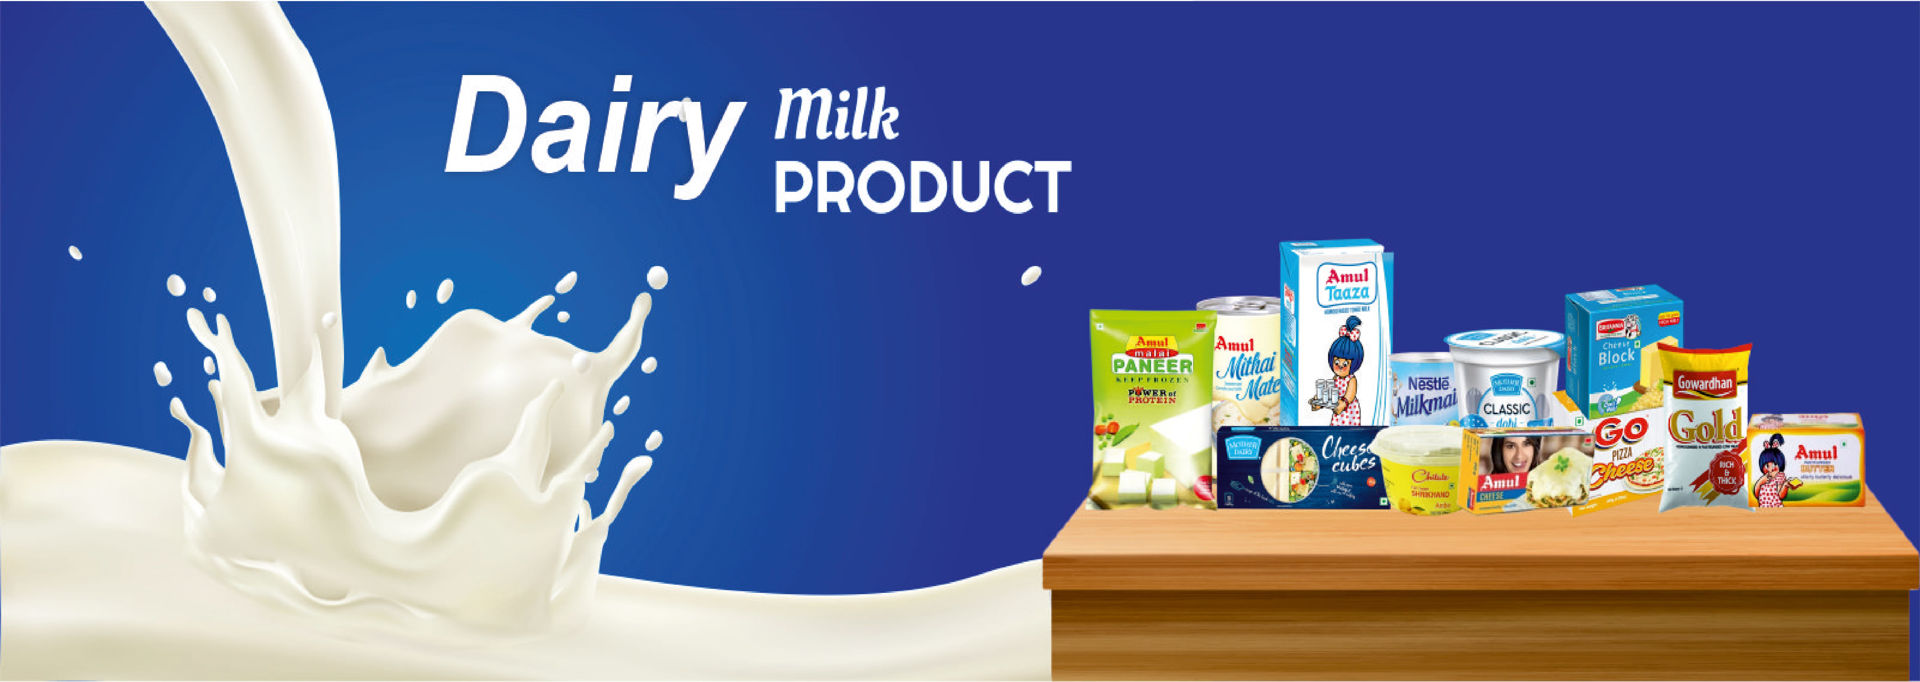



# Problem Statement:

Predict the total revenue generated by dairy product sales based on various features such as location, farm size, product details, pricing, shelf life, storage condition, production and expiration dates, quantity sold, customer location, sales channel, and stock information.

# Objective of Each Column:

Location: The geographical location where the dairy products are sold.

Total Land Area (acres): The total land area of the farm.

Number of Cows: The number of cows in the farm.

Farm Size: Indicates the size of the farm (e.g., Small, Medium, Large).

Date: The date of the transaction.

Product ID: Unique identifier for each product.

Product Name: Name of the dairy product.

Brand: Brand of the dairy product.

Quantity (liters/kg): Quantity of the product in liters or kilograms.

Price per Unit: Price per unit of the product.

Total Value: Total value of the product sold (Quantity * Price per Unit).

Shelf Life (days): Shelf life of the product in days.

Storage Condition: Condition required for storing the product (e.g., Frozen, Refrigerated).

Production Date: Date when the product was produced.

Expiration Date: Date when the product expires.

Quantity Sold (liters/kg): Quantity of the product sold.

Price per Unit (sold): Price per unit at which the product was sold.

Approx. Total Revenue(INR): Approximate total revenue generated from the sales.

Customer Location: Location of the customer who purchased the product.

Sales Channel: Channel through which the product was sold (e.g., Wholesale, Online).

Quantity in Stock (liters/kg): Quantity of the product available in stock.

Minimum Stock Threshold (liters/kg): Minimum quantity threshold for stock replenishment.

Reorder Quantity (liters/kg): Quantity to be reordered when stock falls below the minimum threshold.

# Target Variable:

The target variable is "Approx. Total Revenue(INR)," representing the total revenue generated from the sales of dairy products. The goal is to optimize this revenue through analysis and decision-making processes.

# Objective:

The objective is to build a predictive model that can accurately forecast the total revenue generated from dairy product sales based on the given features. This model can help dairy companies optimize their sales strategies, pricing, and inventory management to maximize revenue.


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the Excel file
df = pd.read_excel("/content/drive/MyDrive/imarticus/stats/2.Group02_Dairy_Dataset_FMCG (1).xlsx")

In [ ]:
# Display the all columns in the dataset.
pd.set_option('display.max_columns', None)

In [ ]:
## Display the first five rows in the dataset.
df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,19064.1280,25,Frozen,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,29293.5228,22,Tetra Pack,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,18377.0200,30,Refrigerated,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,21835.5072,72,Frozen,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,12390.5145,11,Refrigerated,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [ ]:
# Display the last five rows in the dataset.
df.tail()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,49080.9050,5,Refrigerated,2022-02-16,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,45294.5655,23,Refrigerated,2022-03-22,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,54043.4916,7,Refrigerated,2020-01-04,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,47.4300,7,Refrigerated,2022-10-02,2022-10-09,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84
4324,Rajasthan,492.86,58,Large,2019-01-20,1,Milk,Mother Dairy,820.50,49.31,40458.8550,1,Polythene Packet,2019-01-06,2019-01-07,417,44.55,18577.35,Madhya Pradesh,Online,403,22.34,189.63


In [ ]:
# Remove '/' from column names
df = df.rename(columns=lambda x: x.replace('.', '_'))

In [ ]:
# Remove '/' from column names
df = df.rename(columns=lambda x: x.replace('/', '_'))

In [ ]:
# Remove '.' from column names
df = df.rename(columns=lambda x: x.replace('.', ''))

In [ ]:
# Remove '()' from column names using lambda
df.columns = df.columns.map(lambda x: x.replace('(', '').replace(')', ''))

Observation

Using a lambda function in this context is a bit more flexible and allows for more complex transformations if needed.

In [ ]:
# Display the all information in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Location                           4325 non-null   object        
 1   Total_Land_Area_acres              4325 non-null   float64       
 2   Number_of_Cows                     4325 non-null   int64         
 3   Farm_Size                          4325 non-null   object        
 4   Date                               4325 non-null   datetime64[ns]
 5   Product_ID                         4325 non-null   int64         
 6   Product_Name                       4325 non-null   object        
 7   Brand                              4325 non-null   object        
 8   Quantity_liters_kg                 4325 non-null   float64       
 9   Price_per_Unit                     4325 non-null   float64       
 10  Total_Value                        4

**Observation**:

The dataset contains 4325 entries.

There are 23 columns in the dataset.

Each column represents different attributes or features of the data.

The data types of the columns include float64, int64, datetime64, and object.

The columns include information such as location, land area, number of cows, farm size, date, product details (ID, name, brand), quantity, price, shelf life, storage condition, production and expiration dates, sales information (quantity sold, price per unit sold, total revenue), customer location, sales channel, and stock-related information (quantity in stock, minimum stock threshold, reorder quantity).

In [ ]:
# Display the sum of all columns null values.
df.isna().sum()

Location                             0
Total_Land_Area_acres                0
Number_of_Cows                       0
Farm_Size                            0
Date                                 0
Product_ID                           0
Product_Name                         0
Brand                                0
Quantity_liters_kg                   0
Price_per_Unit                       0
Total_Value                          0
Shelf_Life_days                      0
Storage_Condition                    0
Production_Date                      0
Expiration_Date                      0
Quantity_Sold_liters_kg              0
Price_per_Unit_sold                  0
Approx_Total_RevenueINR              0
Customer_Location                    0
Sales_Channel                        0
Quantity_in_Stock_liters_kg          0
Minimum_Stock_Threshold_liters_kg    0
Reorder_Quantity_liters_kg           0
dtype: int64

**Observation**

There are no missing values (null values) in any of the columns. Each column has zero null values, implying that all 4325 entries have non-null values for every attribute.

In [ ]:
# Size of the data set
df.size

99475

In [ ]:
# Display the all row and columns coumnt
df.shape

(4325, 23)

In [ ]:
# Describe the all dataset for understanding like (Mean ,median,mode,min,max)
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe(include='all').T

<ipython-input-14-d982fc93058a>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T
<ipython-input-14-d982fc93058a>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T
<ipython-input-14-d982fc93058a>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Location,4325,15,Delhi,525,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Land_Area_acres,4325.000,NaN,NaN,NaN,NaT,NaT,503.483,285.935,10.170,252.950,509.170,751.250,999.530
Number_of_Cows,4325.000,NaN,NaN,NaN,NaT,NaT,54.964,26.111,10.000,32.000,55.000,77.000,100.000
Farm_Size,4325,3,Large,1462,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,4325,1278,2021-01-28 00:00:00,11,2019-01-01,2022-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_ID,4325.000,NaN,NaN,NaN,NaT,NaT,5.510,2.843,1.000,3.000,6.000,8.000,10.000
Product_Name,4325,10,Curd,479,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brand,4325,11,Amul,1053,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity_liters_kg,4325.000,NaN,NaN,NaN,NaT,NaT,500.653,288.976,1.170,254.170,497.550,749.780,999.930
Price_per_Unit,4325.000,NaN,NaN,NaN,NaT,NaT,54.786,26.003,10.030,32.460,54.400,77.460,99.990


**Observation:**

Location:

There are 15 unique locations, with "Delhi" being the most frequent (appearing 525 times).

Total_Land_Area_acres:

The mean total land area is approximately 503.48 acres, with a standard deviation of 285.94 acres.
The minimum land area is 10.17 acres, while the maximum is 999.53 acres.

Number_of_Cows:

The mean number of cows is around 54.96, with a standard deviation of 26.11.
The minimum number of cows is 10, and the maximum is 100.

Farm_Size:

There are three categories of farm size, with "Large" being the most common (appearing 1462 times).

Date:

There are 1278 unique dates in the dataset, ranging from 2019-01-01 to 2022-12-28.

Product_ID:

The mean product ID is approximately 5.51, with a standard deviation of 2.84.
The minimum product ID is 1, and the maximum is 10.

Product_Name:

There are 10 unique product names, with "Curd" being the most common (appearing 479 times).

Brand:

There are 11 unique brands, with "Amul" being the most frequent (appearing 1053 times).

Quantity_liters_kg, Price_per_Unit, Total_Value, Shelf_Life_days, Quantity_Sold_liters_kg, Price_per_Unit_sold, Approx_Total_RevenueINR, Quantity_in_Stock_liters_kg, Minimum_Stock_Threshold_liters_kg, Reorder_Quantity_liters_kg:

These columns provide information about quantities, prices, revenue, shelf life, and stock-related metrics. The statistical summary includes mean, standard deviation, minimum, maximum, and quartile values for each of these columns.

Storage_Condition, Customer_Location, Sales_Channel:

These categorical columns provide information about storage conditions, customer locations, and sales channels. Each has a count of unique values, the top value, and its frequency.

In [ ]:
# Display the all columns names
df.columns

Index(['Location', 'Total_Land_Area_acres', 'Number_of_Cows', 'Farm_Size',
       'Date', 'Product_ID', 'Product_Name', 'Brand', 'Quantity_liters_kg',
       'Price_per_Unit', 'Total_Value', 'Shelf_Life_days', 'Storage_Condition',
       'Production_Date', 'Expiration_Date', 'Quantity_Sold_liters_kg',
       'Price_per_Unit_sold', 'Approx_Total_RevenueINR', 'Customer_Location',
       'Sales_Channel', 'Quantity_in_Stock_liters_kg',
       'Minimum_Stock_Threshold_liters_kg', 'Reorder_Quantity_liters_kg'],
      dtype='object')

In [ ]:
# Show the object columns names
df.select_dtypes(include=["object"]).columns

Index(['Location', 'Farm_Size', 'Product_Name', 'Brand', 'Storage_Condition',
       'Customer_Location', 'Sales_Channel'],
      dtype='object')

**Observation:**

There are 7 features categorical in the dataset

In [ ]:
unique_values_column = df['Location'].unique()

# Display the unique values in the Location column
print("Unique values in 'Location' column:")
print(unique_values_column)

Unique values in 'Location' column:
['Telangana' 'Uttar Pradesh' 'Tamil Nadu' 'Maharashtra' 'Karnataka'
 'Bihar' 'West Bengal' 'Madhya Pradesh' 'Chandigarh' 'Delhi' 'Gujarat'
 'Kerala' 'Jharkhand' 'Rajasthan' 'Haryana']


**Observation:**

There are 15 unique States in 'Location' column.

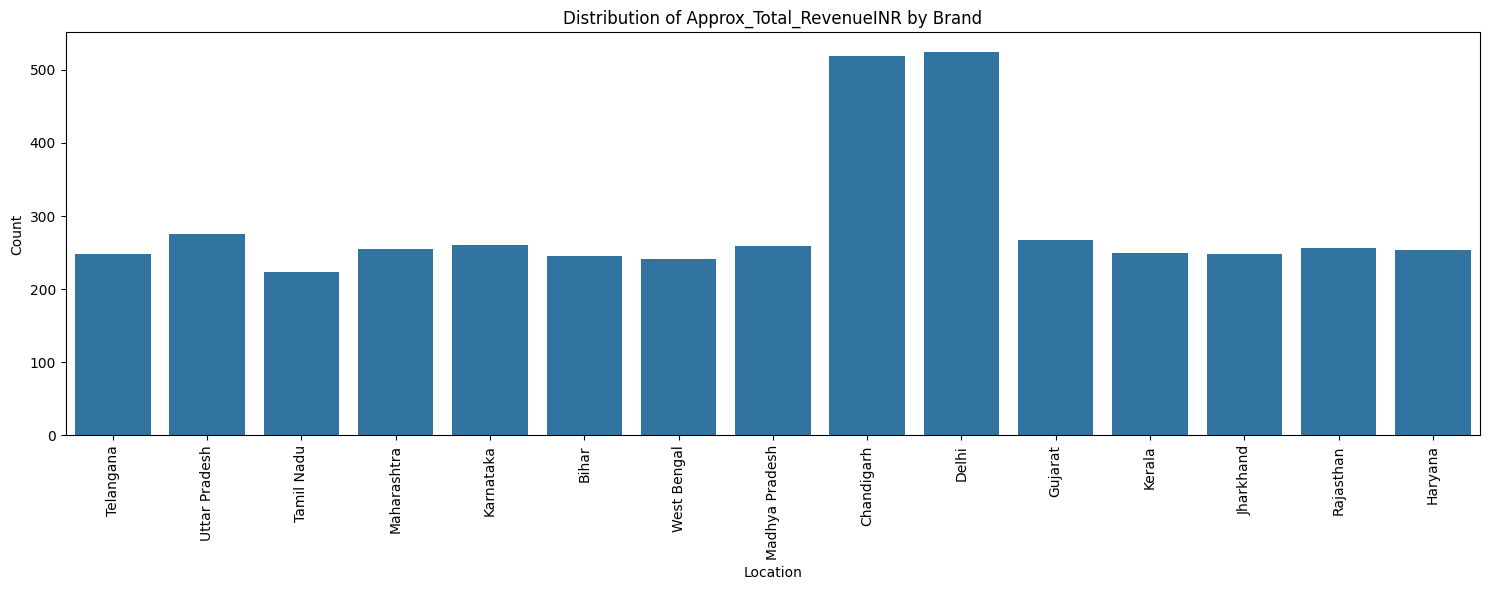

In [ ]:
# Count Plot: Distribution of Approx_Total_RevenueINR by Location
plt.figure(figsize=(15, 6))
sns.countplot(x='Location', data=df)
plt.title('Distribution of Approx_Total_RevenueINR by Brand')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observation:**
we noticed that the counts for the categories "Chandigarh" and "Delhi" are relatively higher compared to the counts for other categories.

In [ ]:
unique_values_column = df['Farm_Size'].unique()

# Display the unique values in the Farm_Size column
print("Unique values in 'Farm_Size' column:")
print(unique_values_column)

Unique values in 'Farm_Size' column:
['Medium' 'Large' 'Small']


**Observation**: Unique Values in the 'Farm_Size' Column

Upon inspecting the 'Farm_Size' column of our dataset, we identified three unique categories: 'Medium', 'Large', and 'Small'. These categories likely represent different scales or sizes of farms within our dataset. Understanding the distribution of farm sizes may offer insights into agricultural practices, resource allocation, or economic factors affecting farming operations.

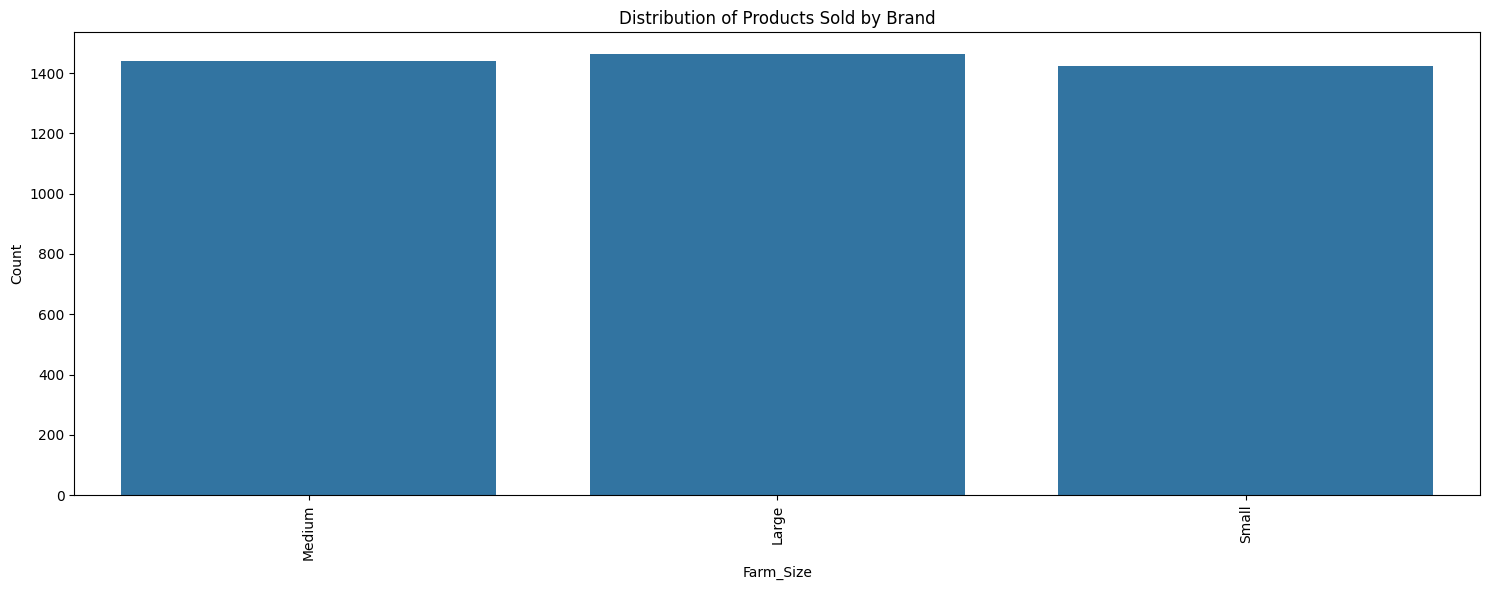

In [ ]:
# Count Plot: Distribution of Farm_Size
plt.figure(figsize=(15, 6))
sns.countplot(x='Farm_Size', data=df)
plt.title('Distribution of Products Sold by Brand')
plt.xlabel('Farm_Size')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
unique_values_column = df['Product_Name'].unique()

# Display the unique values in the Product_Name column
print("Unique values in 'Product_Name' column:")
print(unique_values_column)

Unique values in 'Product_Name' column:
['Ice Cream' 'Milk' 'Yogurt' 'Cheese' 'Buttermilk' 'Curd' 'Paneer' 'Lassi'
 'Ghee' 'Butter']




**Observation:** Unique Values in the 'Product_Name' Column is 11

Upon examination of the 'Product_Name' column in our dataset, we discovered ten unique product categories: 'Ice Cream', 'Milk', 'Yogurt', 'Cheese', 'Buttermilk', 'Curd', 'Paneer', 'Lassi', 'Ghee', and 'Butter'. These categories represent a diverse range of dairy products, which may include various types and forms of dairy items. Understanding the distribution and frequency of these products within our dataset can provide valuable insights into consumer preferences, market trends, and potential business opportunities within the dairy industry.

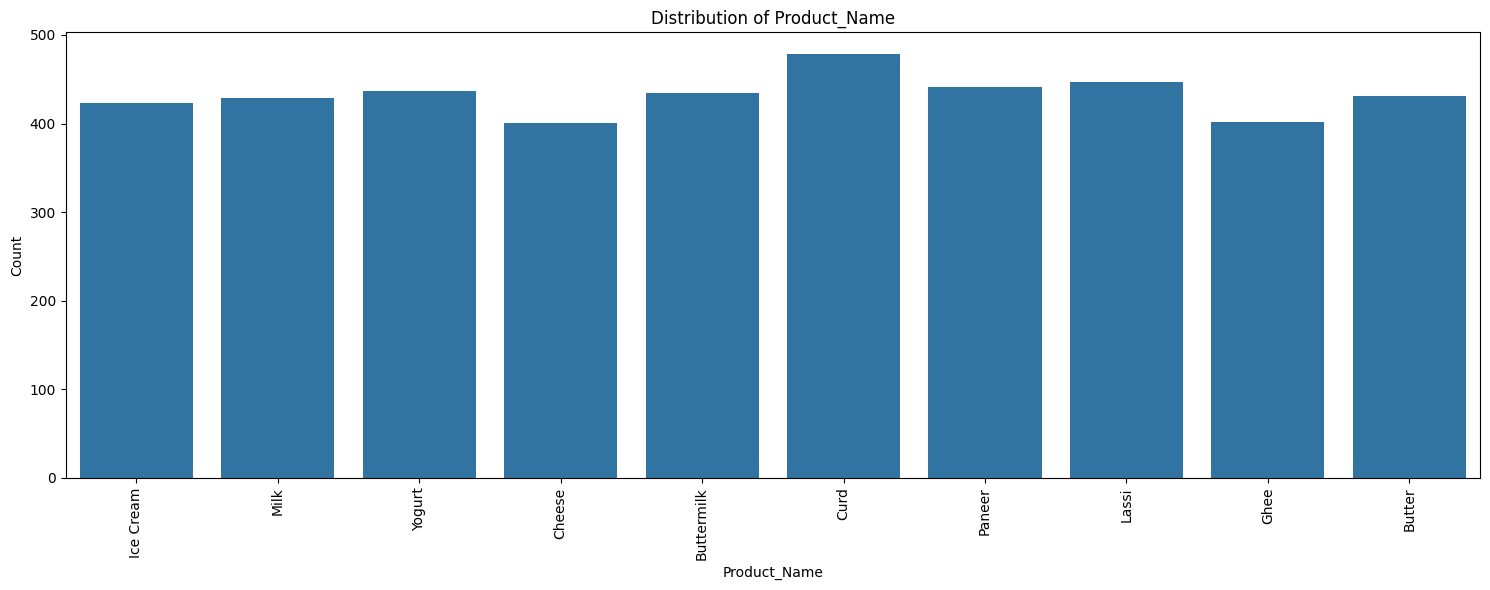

In [ ]:
# Count Plot: Distribution of Product_Name
plt.figure(figsize=(15, 6))
sns.countplot(x='Product_Name', data=df)
plt.title('Distribution of Product_Name')
plt.xlabel('Product_Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observation:**

count plot show the other than curd coumnt is high and other product count is little simmilar each other

In [ ]:
unique_values_column = df['Brand'].unique()

# Display the unique values Brand column
print("Unique values in 'Brand' column:")
print(unique_values_column)

Unique values in 'Brand' column:
['Dodla Dairy' 'Amul' 'Britannia Industries' 'Mother Dairy' 'Raj'
 'Dynamix Dairies' 'Sudha' 'Passion Cheese' 'Warana' 'Palle2patnam'
 'Parag Milk Foods']


**Observation:**

The 'Product_Name' column 11 unique values

'Dodla Dairy' 'Amul' 'Britannia Industries' 'Mother Dairy' 'Raj'
 'Dynamix Dairies' 'Sudha' 'Passion Cheese' 'Warana' 'Palle2patnam'
 'Parag Milk Foods'.

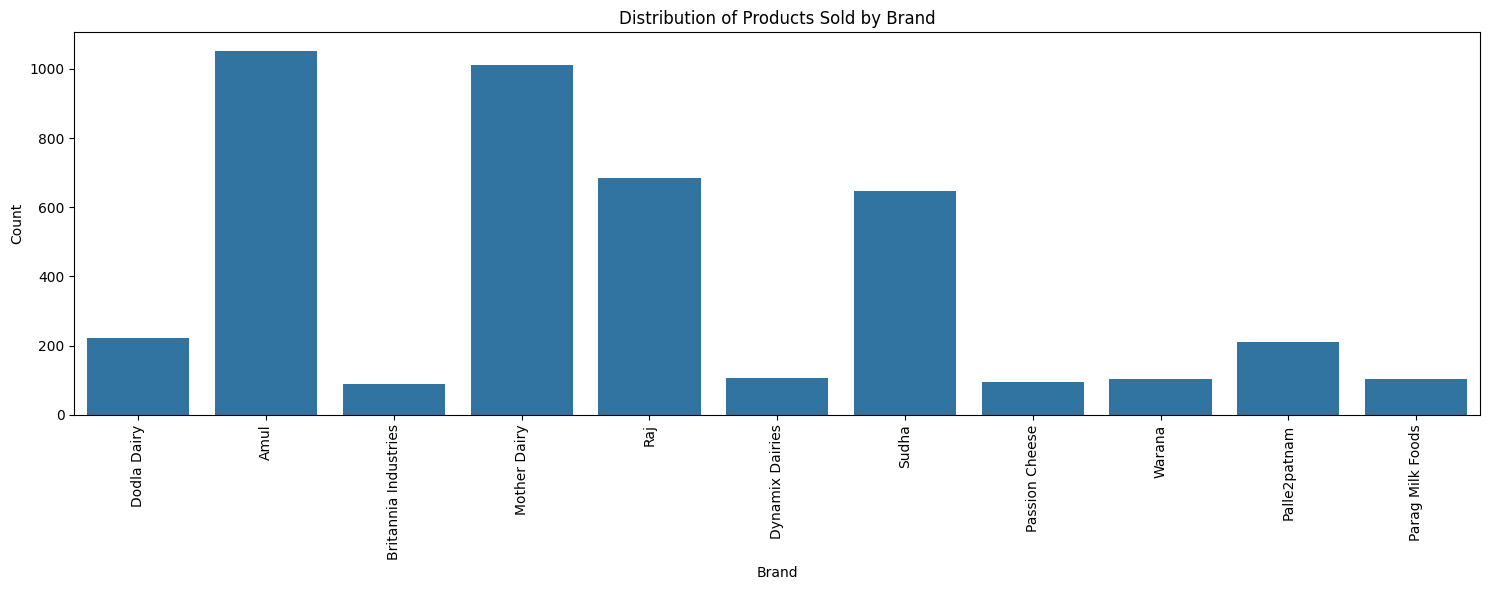

In [ ]:
# Count Plot: Distribution of products sold by brand
plt.figure(figsize=(15, 6))
sns.countplot(x='Brand', data=df)
plt.title('Distribution of Products Sold by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observation:**

There plot show the Amul brand and Mother Dairy brand  count is high

In [ ]:
# Extracting the year from the Date column and creating a new column Year
df["Year"] = df['Date'].dt.year

# Extracting the month from the Date column and creating a new column Month
df['Month'] = df['Date'].dt.month

# Extracting the day from the Date column and creating a new column Day
df['Day'] = df['Date'].dt.day

**Observation:**

The new columns Year, Month, and Day provide granularity to the dataset, allowing for more detailed temporal analysis.

In [ ]:
# Define the years of interest
years_of_interest = [2019, 2020, 2021, 2022]

# Iterate over each year
for year in years_of_interest:
    # Filter the data for the brand 'Amul' and the current year
    Amul_yearly_data = df[(df['Brand'] == 'Amul') & (df['Year'] == year)]

    # Group the data by 'Product_Name' and calculate the sum of 'Approx_Total_RevenueINR'
    Amul_product_sales_yearly = Amul_yearly_data.groupby('Product_Name')['Approx_Total_RevenueINR'].sum().reset_index()

    # Display the result for the current year
    print(f"Year {year}:")
    print(Amul_product_sales_yearly)
    print()


Year 2019:
  Product_Name  Approx_Total_RevenueINR
0       Butter               442414.840
1   Buttermilk               293602.130
2       Cheese               381144.440
3         Curd               385206.210
4         Ghee               239228.110
5    Ice Cream               316070.890
6        Lassi               535470.020
7         Milk               440854.990
8       Paneer               318048.400
9       Yogurt               299933.380

Year 2020:
  Product_Name  Approx_Total_RevenueINR
0       Butter               178567.070
1   Buttermilk               398305.820
2       Cheese               339765.060
3         Curd               462051.970
4         Ghee               357340.740
5    Ice Cream               437810.900
6        Lassi               490471.460
7         Milk               330213.800
8       Paneer               442450.410
9       Yogurt               533069.370

Year 2021:
  Product_Name  Approx_Total_RevenueINR
0       Butter               495427.330
1   B

**Observation:**

Amul brand  10 products making  

1   Buttermilk               
2       Cheese               
3         Curd               
4         Ghee               
5    Ice Cream               
6        Lassi               
7         Milk               
8       Paneer               
9       Yogurt

10     Butter

Amul brand products  year 2019  highest total revenue ptoduct Lassi is 535470.020

Amul brand products  year 2020  highest total revenue ptoduct Lassi is 490471.460

Amul brand products  year 2021  highest total revenue ptoduct Butter is  495427.330

Amul brand products  year 2022  highest total revenue ptoduct Cheese is 536184.360


In [ ]:
# Define the years of interest
years_of_interest = [2019, 2020, 2021, 2022]

# Iterate over each year
for year in years_of_interest:
    # Filter the data for the brand 'Dodla Dairy' and the current year
    dodla_dairy_yearly_data = df[(df['Brand'] == 'Dodla Dairy') & (df['Year'] == year)]

    # Group the data by 'Product_Name' and calculate the sum of 'Approx_Total_RevenueINR'
    dodla_dairy_product_sales_yearly = dodla_dairy_yearly_data.groupby('Product_Name')['Approx_Total_RevenueINR'].sum().reset_index()

    # Display the result for the current year
    print(f"Year {year}:")
    print(dodla_dairy_product_sales_yearly)
    print()


Year 2019:
  Product_Name  Approx_Total_RevenueINR
0    Ice Cream               313713.200
1       Yogurt               357094.200

Year 2020:
  Product_Name  Approx_Total_RevenueINR
0    Ice Cream               258817.210
1       Yogurt               501870.650

Year 2021:
  Product_Name  Approx_Total_RevenueINR
0    Ice Cream               319037.530
1       Yogurt               308304.190

Year 2022:
  Product_Name  Approx_Total_RevenueINR
0    Ice Cream               305272.350
1       Yogurt               240748.040



**Observation:**

Dodla Dairy brand only two products making Ice Cream and Yogurt


Dodla Dairy brand products  year 2019  highest total revenue ptoduct Yogurt is 357094.200

Dodla Dairy brand products  year 2020  highest total revenue ptoduct Yogurt is  501870.650

Dodla Dairy brand products  year 2021  highest total revenue ptoduct Yogurt is  308304.190

Dodla Dairy brand products  year 2022  highest total revenue ptoduct Ice Cream is 305272.350


In [ ]:
# Define the years of interest
years_of_interest = [2019, 2020, 2021, 2022]

# Iterate over each year
for year in years_of_interest:
    # Filter the data for the brand 'Britannia Industries' and the current year
    britannia_yearly_data = df[(df['Brand'] == 'Britannia Industries') & (df['Year'] == year)]

    # Group the data by 'Product_Name' and calculate the sum of 'Approx_Total_RevenueINR'
    britannia_product_sales_yearly = britannia_yearly_data.groupby('Product_Name')['Approx_Total_RevenueINR'].sum().reset_index()

    # Display the result for the current year
    print(f"Year {year}:")
    print(britannia_product_sales_yearly)
    print()


Year 2019:
  Product_Name  Approx_Total_RevenueINR
0       Cheese               223305.190

Year 2020:
  Product_Name  Approx_Total_RevenueINR
0       Cheese               186494.220

Year 2021:
  Product_Name  Approx_Total_RevenueINR
0       Cheese               214708.280

Year 2022:
  Product_Name  Approx_Total_RevenueINR
0       Cheese               405014.360



**Observation:**

Britannia Industries brand only one products making Cheese

Britannia Industries brand products year 2019 highest total revenue ptoduct  Cheese               223305.190

Britannia Industries brand products year 2020 highest total revenue ptoduct Cheese               186494.220

Britannia Industries brand products year 2021 highest total revenue ptoduct    Cheese               214708.280

Britannia Industries brand products year 2022 highest total revenue ptoduct Cheese               405014.360



In [ ]:
# Define the years of interest
years_of_interest = [2019, 2020, 2021, 2022]

# Iterate over each year
for year in years_of_interest:
    # Filter the data for the brand 'Mother Dairy' and the current year
    mother_dairy_yearly_data = df[(df['Brand'] == 'Mother Dairy') & (df['Year'] == year)]

    # Group the data by 'Product_Name' and calculate the sum of 'Approx_Total_RevenueINR'
    mother_dairy_product_sales_yearly = mother_dairy_yearly_data.groupby('Product_Name')['Approx_Total_RevenueINR'].sum().reset_index()

    # Display the result for the current year
    print(f"Year {year}:")
    print(mother_dairy_product_sales_yearly)
    print()


Year 2019:
  Product_Name  Approx_Total_RevenueINR
0       Butter               435443.830
1   Buttermilk               561003.930
2         Curd               503803.240
3         Ghee               475817.880
4    Ice Cream               355061.300
5        Lassi               381682.610
6         Milk               441664.600
7       Paneer               461873.510
8       Yogurt               239568.080

Year 2020:
  Product_Name  Approx_Total_RevenueINR
0       Butter               243197.150
1   Buttermilk               346361.960
2         Curd               616013.240
3         Ghee               308326.390
4    Ice Cream               460065.620
5        Lassi               350143.170
6         Milk               428932.890
7       Paneer               384582.410
8       Yogurt               207492.070

Year 2021:
  Product_Name  Approx_Total_RevenueINR
0       Butter               299261.640
1   Buttermilk               397867.660
2         Curd               442114.390
3    

**Observation:**

Britannia Industries brand only nine products making                
1   Buttermilk              
2         Curd              
3         Ghee              
4    Ice Cream              
5        Lassi              
6         Milk              
7       Paneer              
8       Yogurt

9      Butter

Britannia Industries brand products year 2019 highest total revenue ptoduct   Buttermilk               561003.930

Britannia Industries brand products year 2020 highest total revenue ptoduct Curd               616013.240

Britannia Industries brand products year 2021 highest total revenue ptoduct    Yogurt               700429.480

Britannia Industries brand products year 2022 highest total revenue ptoduct  Butter               552448.190

In [ ]:
# Define the years of interest
years_of_interest = [2019, 2020, 2021, 2022]

# Iterate over each year
for year in years_of_interest:
    # Filter the data for the brand 'Raj' and the current year
    raj_yearly_data = df[(df['Brand'] == 'Raj') & (df['Year'] == year)]

    # Group the data by 'Product_Name' and calculate the sum of 'Approx_Total_RevenueINR'
    raj_product_sales_yearly = raj_yearly_data.groupby('Product_Name')['Approx_Total_RevenueINR'].sum().reset_index()

    # Display the result for the current year
    print(f"Year {year}:")
    print(raj_product_sales_yearly)
    print()


Year 2019:
  Product_Name  Approx_Total_RevenueINR
0   Buttermilk               471151.120
1         Curd               287956.600
2         Ghee               293563.350
3        Lassi               522461.430
4         Milk               453323.990
5       Paneer               446540.970

Year 2020:
  Product_Name  Approx_Total_RevenueINR
0   Buttermilk               282933.450
1         Curd               427436.190
2         Ghee               373242.660
3        Lassi               360264.690
4         Milk               518919.190
5       Paneer               373671.720

Year 2021:
  Product_Name  Approx_Total_RevenueINR
0   Buttermilk               418669.700
1         Curd               335724.640
2         Ghee               295132.930
3        Lassi               443301.930
4         Milk               378240.010
5       Paneer               369449.820

Year 2022:
  Product_Name  Approx_Total_RevenueINR
0   Buttermilk               375967.340
1         Curd               4527

**Observation:**

Raj brand only six products making
               
1         Curd             
2         Ghee             
3        Lassi             
4         Milk             
5       Paneer

6    Buttermilk


Raj brand products year 2019 highest total revenue ptoduct Lassi               522461.430

Raj brand products year 2020 highest total revenue ptoduct Milk               518919.190

Raj brand products year 2021 highest total revenue ptoduct  Lassi               443301.930


Raj brand products year 2022 highest total revenue ptoduct Paneer               568254.810

In [ ]:
# Define the years of interest
years_of_interest = [2019, 2020, 2021, 2022]

# Iterate over each year
for year in years_of_interest:
    # Filter the data for the brand 'Dynamix Dairies' and the current year
    dynamix_dairies_yearly_data = df[(df['Brand'] == 'Dynamix Dairies') & (df['Year'] == year)]

    # Group the data by 'Product_Name' and calculate the sum of 'Approx_Total_RevenueINR'
    dynamix_dairies_product_sales_yearly = dynamix_dairies_yearly_data.groupby('Product_Name')['Approx_Total_RevenueINR'].sum().reset_index()

    # Display the result for the current year
    print(f"Year {year}:")
    print(dynamix_dairies_product_sales_yearly)
    print()


Year 2019:
  Product_Name  Approx_Total_RevenueINR
0       Cheese               333284.090

Year 2020:
  Product_Name  Approx_Total_RevenueINR
0       Cheese               420268.880

Year 2021:
  Product_Name  Approx_Total_RevenueINR
0       Cheese               407290.300

Year 2022:
  Product_Name  Approx_Total_RevenueINR
0       Cheese               319041.510



**Observation:**

Raj brand only one products making Cheese

Dynamix Dairies brand products year 2019 highest total revenue ptoduct    Cheese               333284.090

Dynamix Dairies brand products year 2020 highest total revenue ptoduct Cheese               420268.880

Dynamix Dairies brand products year 2021 highest total revenue ptoduct    Cheese               407290.300

Dynamix Dairies brand products year 2022 highest total revenue ptoduct Cheese               319041.510

In [ ]:
# Define the years of interest
years_of_interest = [2019, 2020, 2021, 2022]

# Iterate over each year
for year in years_of_interest:
    # Filter the data for the brand 'Sudha' and the current year
    sudha_yearly_data = df[(df['Brand'] == 'Sudha') & (df['Year'] == year)]

    # Group the data by 'Product_Name' and calculate the sum of 'Approx_Total_RevenueINR'
    sudha_product_sales_yearly = sudha_yearly_data.groupby('Product_Name')['Approx_Total_RevenueINR'].sum().reset_index()

    # Display the result for the current year
    print(f"Year {year}:")
    print(sudha_product_sales_yearly)
    print()


Year 2019:
  Product_Name  Approx_Total_RevenueINR
0   Buttermilk               309547.140
1         Curd               438278.510
2         Ghee               446906.860
3        Lassi               311604.290
4         Milk               200009.780
5       Paneer               305188.580

Year 2020:
  Product_Name  Approx_Total_RevenueINR
0   Buttermilk               292700.910
1         Curd               408845.970
2         Ghee               317838.050
3        Lassi               309387.920
4         Milk               360526.600
5       Paneer               375274.230

Year 2021:
  Product_Name  Approx_Total_RevenueINR
0   Buttermilk               336703.650
1         Curd               374645.500
2         Ghee               155373.770
3        Lassi               306536.200
4         Milk               340426.280
5       Paneer               427172.700

Year 2022:
  Product_Name  Approx_Total_RevenueINR
0   Buttermilk               267334.050
1         Curd               5365

**Observation:**

Sudha brand only six products making                
1         Curd               
2         Ghee               
3        Lassi               
4         Milk               
5       Paneer               
6     Buttermilk

Sudha brand products year 2019 highest total revenue ptoduct Ghee               446906.860

Sudha brand products year 2020 highest total revenue ptoduct Curd               408845.970

Sudha brand products year 2021 highest total revenue ptoduct Paneer               427172.700

Sudha brand products year 2022 highest total revenue ptoduct Curd               536508.530

In [ ]:
# Define the years of interest
years_of_interest = [2019, 2020, 2021, 2022]

# Iterate over each year
for year in years_of_interest:
    # Filter the data for the brand 'Passion Cheese' and the current year
    passion_cheese_yearly_data = df[(df['Brand'] == 'Passion Cheese') & (df['Year'] == year)]

    # Group the data by 'Product_Name' and calculate the sum of 'Approx_Total_RevenueINR'
    passion_cheese_product_sales_yearly = passion_cheese_yearly_data.groupby('Product_Name')['Approx_Total_RevenueINR'].sum().reset_index()

    # Display the result for the current year
    print(f"Year {year}:")
    print(passion_cheese_product_sales_yearly)
    print()



Year 2019:
  Product_Name  Approx_Total_RevenueINR
0       Cheese               514504.190

Year 2020:
  Product_Name  Approx_Total_RevenueINR
0       Cheese               317955.300

Year 2021:
  Product_Name  Approx_Total_RevenueINR
0       Cheese               351935.870

Year 2022:
  Product_Name  Approx_Total_RevenueINR
0       Cheese               314257.790



**Observation:**

Passion Cheese brand only one products making Cheese

Passion Cheese brand products year 2019 highest total revenue ptoduct Cheese               514504.190

Passion Cheese brand products year 2020 highest total revenue ptoduct Cheese               317955.300

Passion Cheese brand products year 2021 highest total revenue ptoduct  Cheese               351935.870

Passion Cheese brand products year 2022 highest total revenue ptoduct   Cheese               314257.790

In [ ]:
# Define the years of interest
years_of_interest = [2019, 2020, 2021, 2022]

# Iterate over each year
for year in years_of_interest:
    # Filter the data for the brand 'Warana' and the current year
    warana_yearly_data = df[(df['Brand'] == 'Warana') & (df['Year'] == year)]

    # Group the data by 'Product_Name' and calculate the sum of 'Approx_Total_RevenueINR'
    warana_product_sales_yearly = warana_yearly_data.groupby('Product_Name')['Approx_Total_RevenueINR'].sum().reset_index()

    # Display the result for the current year
    print(f"Year {year}:")
    print(warana_product_sales_yearly)
    print()


Year 2019:
  Product_Name  Approx_Total_RevenueINR
0       Butter               584268.920

Year 2020:
  Product_Name  Approx_Total_RevenueINR
0       Butter               286591.100

Year 2021:
  Product_Name  Approx_Total_RevenueINR
0       Butter               430047.560

Year 2022:
  Product_Name  Approx_Total_RevenueINR
0       Butter               468597.970



**Observation:**

Warana brand only one products making Butter

Warana brand products year 2019 highest total revenue ptoduct  Butter               584268.920

Warana brand products year 2020 highest total revenue ptoduct Butter               286591.100

Warana brand products year 2021 highest total revenue ptoduct  Butter               430047.560

Warana brand products year 2022 highest total revenue ptoduct Butter               468597.970

In [ ]:
# Define the years of interest
years_of_interest = [2019, 2020, 2021, 2022]

# Iterate over each year
for year in years_of_interest:
    # Filter the data for the brand 'Palle2patnam' and the current year
    palle2patnam_yearly_data = df[(df['Brand'] == 'Palle2patnam') & (df['Year'] == year)]

    # Group the data by 'Product_Name' and calculate the sum of 'Approx_Total_RevenueINR'
    palle2patnam_product_sales_yearly = palle2patnam_yearly_data.groupby('Product_Name')['Approx_Total_RevenueINR'].sum().reset_index()

    # Display the result for the current year
    print(f"Year {year}:")
    print(palle2patnam_product_sales_yearly)
    print()


Year 2019:
  Product_Name  Approx_Total_RevenueINR
0    Ice Cream               267504.530
1       Yogurt               228895.640

Year 2020:
  Product_Name  Approx_Total_RevenueINR
0    Ice Cream               266318.430
1       Yogurt               376023.390

Year 2021:
  Product_Name  Approx_Total_RevenueINR
0    Ice Cream               345632.430
1       Yogurt               574972.680

Year 2022:
  Product_Name  Approx_Total_RevenueINR
0    Ice Cream               235719.610
1       Yogurt               233922.410



**Observation:**

Palle2patnam brand only one products making
1 Ice Cream

2 Yogurt

Palle2patnam brand products year 2019 highest total revenue ptoduct Ice Cream               267504.530

Palle2patnam brand products year 2020 highest total revenue ptoduct Yogurt               376023.390

Palle2patnam brand products year 2021 highest total revenue ptoduct Yogurt               574972.680

Palle2patnam brand products year 2022 highest total revenue ptoduct Ice Cream               235719.610

In [ ]:
# Define the years of interest
years_of_interest = [2019, 2020, 2021, 2022]

# Iterate over each year
for year in years_of_interest:
    # Filter the data for the brand 'Parag Milk Foods' and the current year
    parag_milk_foods_yearly_data = df[(df['Brand'] == 'Parag Milk Foods') & (df['Year'] == year)]

    # Group the data by 'Product_Name' and calculate the sum of 'Approx_Total_RevenueINR'
    parag_milk_foods_product_sales_yearly = parag_milk_foods_yearly_data.groupby('Product_Name')['Approx_Total_RevenueINR'].sum().reset_index()

    # Display the result for the current year
    print(f"Year {year}:")
    print(parag_milk_foods_product_sales_yearly)
    print()


Year 2019:
  Product_Name  Approx_Total_RevenueINR
0       Butter               421323.640

Year 2020:
  Product_Name  Approx_Total_RevenueINR
0       Butter               503849.130

Year 2021:
  Product_Name  Approx_Total_RevenueINR
0       Butter               372574.980

Year 2022:
  Product_Name  Approx_Total_RevenueINR
0       Butter               218949.960



**Observation:**

Parag Milk Foods brand only one products making Butter

Parag Milk Foods brand products year 2019 highest total revenue ptoduct  Butter               421323.640

Parag Milk Foods brand products year 2020 highest total revenue ptoduct      Butter               503849.130

Parag Milk Foods brand products year 2021 highest total revenue ptoduct Butter               372574.980

Parag Milk Foods brand products year 2022 highest total revenue ptoduct   Butter               218949.960

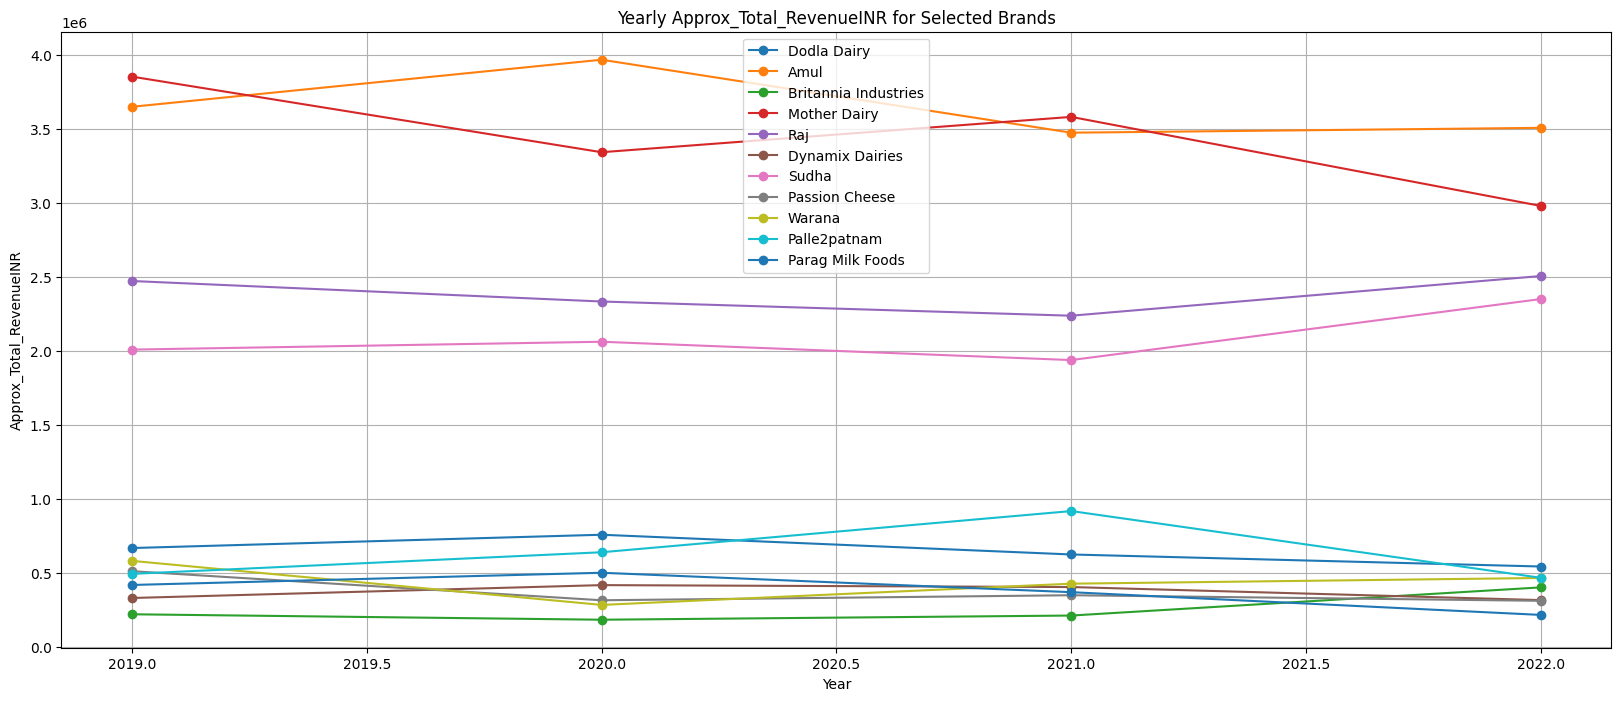

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'Brand' and 'Year', then calculate the sum of 'Approx_Total_RevenueINR'.
brand_yearly_revenue = df.groupby(['Brand', 'Year'])['Approx_Total_RevenueINR'].sum().reset_index()

# Filter out only the brands mentioned in the list
brands_to_plot = ['Dodla Dairy', 'Amul', 'Britannia Industries', 'Mother Dairy', 'Raj',
                  'Dynamix Dairies', 'Sudha', 'Passion Cheese', 'Warana', 'Palle2patnam',
                  'Parag Milk Foods']

# Filter the data to include only the specified brands
filtered_data = brand_yearly_revenue[brand_yearly_revenue['Brand'].isin(brands_to_plot)]

# Plot the data for each brand
plt.figure(figsize=(20, 8))
for brand in brands_to_plot:
    brand_data = filtered_data[filtered_data['Brand'] == brand]
    plt.plot(brand_data['Year'], brand_data['Approx_Total_RevenueINR'], marker='o', label=brand)

plt.title('Yearly Approx_Total_RevenueINR for Selected Brands')
plt.xlabel('Year')
plt.ylabel('Approx_Total_RevenueINR')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
unique_values_column = df['Storage_Condition'].unique()

# Display the unique values Storage_Condition column
print("Unique values in 'Storage_Condition' column:")
print(unique_values_column)

Unique values in 'Storage_Condition' column:
['Frozen' 'Tetra Pack' 'Refrigerated' 'Polythene Packet' 'Ambient']


**Observation:**

There are 5 storage _conditions 'Frozen' , 'Tetra Pack' ,
 'Refrigerated' , 'Polythene Packet' , 'Ambient'

In [ ]:
brand_product_Storage_Condition = df.groupby(['Brand',"Product_Name"])['Storage_Condition'].sum().reset_index()
brand_product_Storage_Condition

,Brand,Product_Name,Storage_Condition
0,Amul,Butter,RefrigeratedRefrigeratedFrozenRefrigeratedRefr...
1,Amul,Buttermilk,RefrigeratedRefrigeratedRefrigeratedRefrigerat...
2,Amul,Cheese,RefrigeratedRefrigeratedRefrigeratedRefrigerat...
3,Amul,Curd,RefrigeratedRefrigeratedRefrigeratedRefrigerat...
4,Amul,Ghee,AmbientAmbientAmbientAmbientAmbientAmbientAmbi...
5,Amul,Ice Cream,FrozenFrozenFrozenFrozenFrozenFrozenFrozenFroz...
6,Amul,Lassi,RefrigeratedRefrigeratedRefrigeratedRefrigerat...
7,Amul,Milk,Tetra PackTetra PackTetra PackPolythene Packet...
8,Amul,Paneer,RefrigeratedRefrigeratedRefrigeratedRefrigerat...
9,Amul,Yogurt,FrozenRefrigeratedFrozenRefrigeratedRefrigerat...


**Observation:**

Brand                  Product Name     Storage Condition

Amul                 =   Butter      =     Refrigerated, Frozen

Amul                  =  Buttermilk   =    Refrigerated

Amul                   = Cheese        =   Refrigerated

Amul                    =Curd           =  Refrigerated

Amul                  =  Ghee            = Ambient

Amul                    =Ice Cream        =Frozen

Amul             =       Lassi            =Refrigerated

Amul              =      Milk           =  Tetra Pack, Polythene Packet

Amul               =     Paneer          = Refrigerated

Amul                =    Yogurt         =  Frozen, Refrigerated

Britannia Industries =   Cheese          = Frozen, Refrigerated

Dodla Dairy           =  Ice Cream        =Frozen

Dodla Dairy            = Yogurt       =    Refrigerated, Frozen

Dynamix Dairies         =Cheese        =   Frozen, Refrigerated

Mother Dairy            =Butter         =  Frozen, Refrigerated

Mother Dairy            =Buttermilk      = Refrigerated

Mother Dairy          =  Curd             =Refrigerated

Mother Dairy           = Ghee           =  Ambient

Mother Dairy            =Ice Cream       = Frozen

Mother Dairy        =    Lassi            =Refrigerated

Mother Dairy         =   Milk            = Polythene Packet, Tetra Pack

Mother Dairy          =  Paneer           =Refrigerated

Mother Dairy           = Yogurt       =    Refrigerated, Frozen

Palle2patnam            =Ice Cream     =   Frozen

Palle2patnam          =  Yogurt         =  Frozen, Refrigerated

Parag Milk Foods       = Butter          = Frozen, Refrigerated

Passion Cheese          =Cheese           =Refrigerated, Frozen

Raj                    = Buttermilk      = Refrigerated

Raj                     =Curd             =Refrigerated

Raj                    = Ghee            = Ambient

Raj                   =  Lassi            =Refrigerated

Raj                    = Milk        =     Polythene Packet

Raj                     =Paneer       =    Refrigerated

Sudha                   =Buttermilk    =   Refrigerated

Sudha                =   Curd           =  Refrigerated

Sudha                 =  Ghee            = Ambient

Sudha                  = Lassi            =Refrigerated

Sudha                  = Milk             =Polythene Packet

Sudha                 =  Paneer          = Refrigerated

Warana                 = Butter           =Frozen, Refrigerated


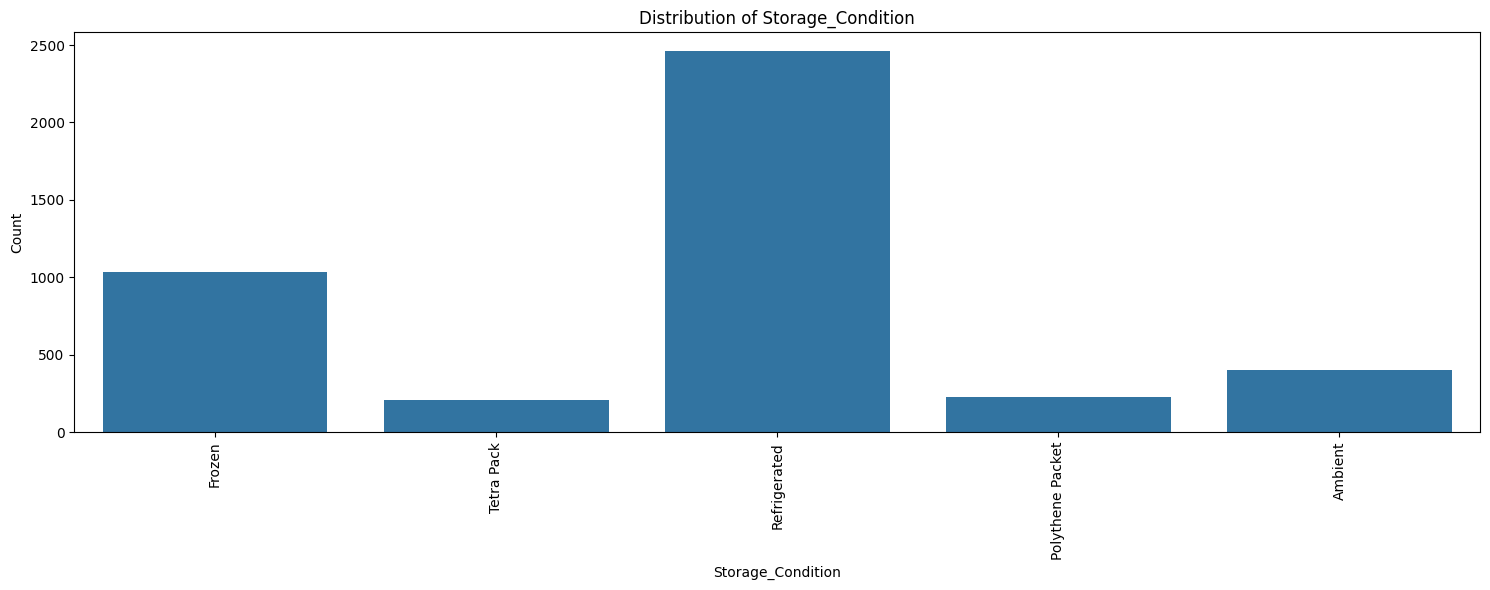

In [ ]:
# Count Plot: Distribution of Storage_Condition
plt.figure(figsize=(15, 6))
sns.countplot(x='Storage_Condition', data=df)
plt.title('Distribution of Storage_Condition')
plt.xlabel('Storage_Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observation:**

 Based on the this graph , "Refrigerated" appears to be the most common storage condition for dairy products.

In [ ]:
unique_values_column = df['Customer_Location'].unique()

# Display the unique values Customer_Location
print("Unique values in 'Customer_Location' column:")
print(unique_values_column)

Unique values in 'Customer_Location' column:
['Madhya Pradesh' 'Kerala' 'Rajasthan' 'Jharkhand' 'Gujarat' 'Karnataka'
 'Haryana' 'Tamil Nadu' 'West Bengal' 'Telangana' 'Chandigarh'
 'Maharashtra' 'Delhi' 'Bihar' 'Uttar Pradesh']


**Observation:**



There are 15 Customer_Location 'Madhya Pradesh' , 'Kerala' ,  'Rajasthan' , 'Jharkhand' , 'Gujarat' , 'Karnataka' ,
 'Haryana' , 'Tamil Nadu' , 'West Bengal' , 'Telangana' ,  'Chandigarh' ,
 'Maharashtra' , 'Delhi' , 'Bihar' , 'Uttar Pradesh'

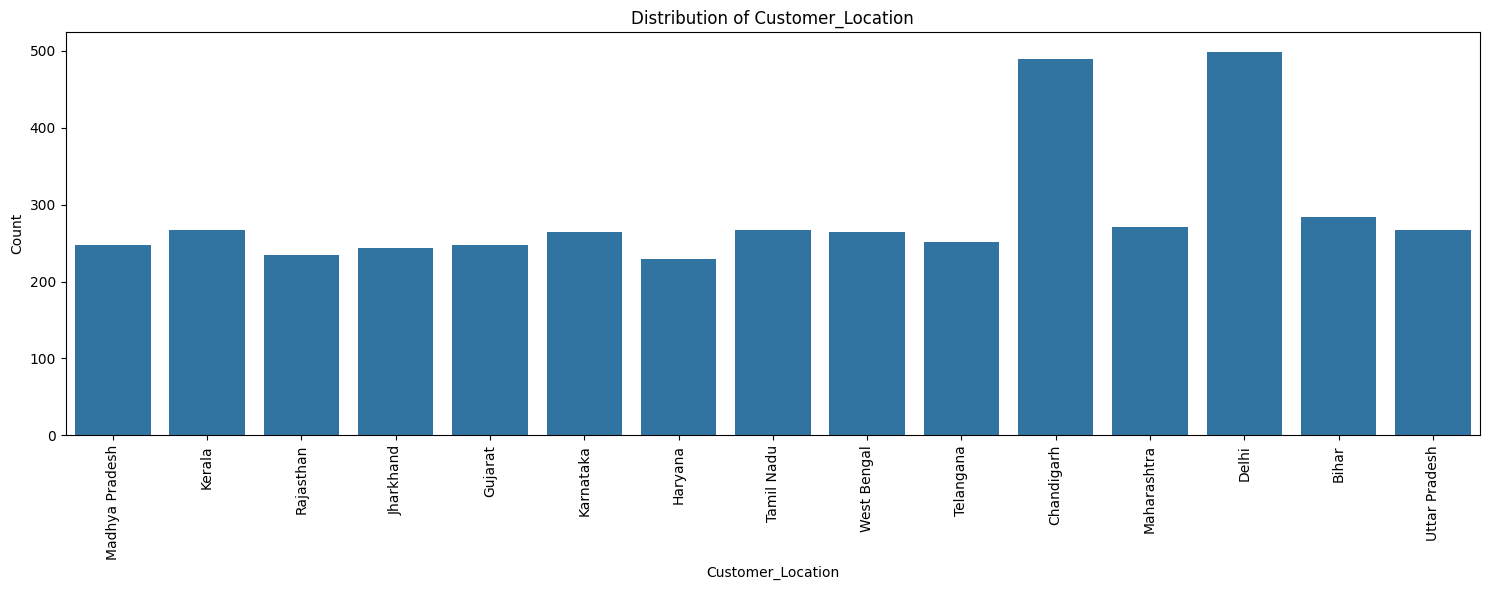

In [ ]:
# Count Plot: Distribution of Customer_Location
plt.figure(figsize=(15, 6))
sns.countplot(x='Customer_Location', data=df)
plt.title('Distribution of Customer_Location')
plt.xlabel('Customer_Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Group the data by 'Year', 'Customer_Location', and sum the Approx_Total_RevenueINR in each location
yearly_customer_location_sales = df.groupby(['Year', 'Customer_Location'])['Approx_Total_RevenueINR'].sum().reset_index()

# Find the location with the highest qApprox_Total_RevenueINR for each year
max_quantity_locations_yearly = yearly_customer_location_sales.loc[yearly_customer_location_sales.groupby('Year')['Approx_Total_RevenueINR'].idxmax()]

# Display the location with the highest Approx_Total_RevenueINR for each year
print("Customer location with the highest Approx_Total_RevenueINR each year:")
print(max_quantity_locations_yearly)


Customer location with the highest Approx_Total_RevenueINR each year:
    Year Customer_Location  Approx_Total_RevenueINR
2   2019             Delhi              1637974.060
16  2020        Chandigarh              2034792.780
32  2021             Delhi              1498324.920
46  2022        Chandigarh              1646555.920


The customer location with the highest approximate total revenue (in INR) varied across different years:

Year 2019: Delhi had the highest total revenue, amounting to approximately 1,637,974.060 INR.

Year 2020: Chandigarh emerged as the top location with the highest total revenue, reaching around 2,034,792.780 INR.

Year 2021: Delhi regained its position as the customer location with the highest total revenue, generating approximately 1,498,324.920 INR.

Year 2022: Similar to 2020, Chandigarh secured the top spot with the highest total revenue, totaling about 1,646,555.920 INR.

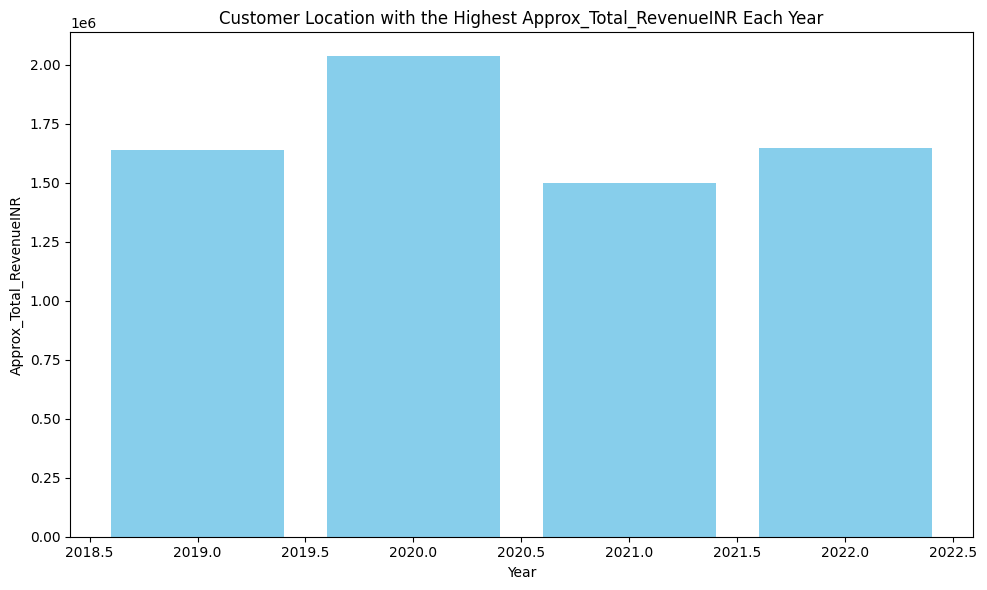

In [ ]:
import matplotlib.pyplot as plt

# Extract the data
years = max_quantity_locations_yearly['Year']
locations = max_quantity_locations_yearly['Customer_Location']
quantities = max_quantity_locations_yearly['Approx_Total_RevenueINR']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(years, quantities, color='skyblue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Approx_Total_RevenueINR')
plt.title('Customer Location with the Highest Approx_Total_RevenueINR Each Year')


# Show plot
plt.tight_layout()
plt.show()


The period from mid-2019 to mid-2020 marked a significant milestone in revenue generation, with the year 2020 standing out as a period of exceptional performance and growth across various customer locations, particularly in regions like Chandigarh.

In [ ]:
unique_values_column = df['Sales_Channel'].unique()

# Display the unique values Sales_Channel column
print("Unique values in 'Sales_Channel' column:")
print(unique_values_column)

Unique values in 'Sales_Channel' column:
['Wholesale' 'Online' 'Retail']


There are 3 Unique Sales_Channel in column 'Wholesale' , 'Online' , 'Retail'

In [ ]:
# Group the data by 'Year', 'Sales_Channel', and sum the Approx_Total_RevenueINR in each channel for each year
yearly_sales_channel_Approx_Total_RevenueINR = df.groupby(['Year', 'Sales_Channel'])['Approx_Total_RevenueINR'].sum().reset_index()

# Display the Approx_Total_RevenueINR for each sales channel each year
print("Year-wise sales channel Approx_Total_RevenueINR:")
print(yearly_sales_channel_Approx_Total_RevenueINR)

Year-wise sales channel Approx_Total_RevenueINR:
    Year Sales_Channel  Approx_Total_RevenueINR
0   2019        Online              4342242.040
1   2019        Retail              5667282.170
2   2019     Wholesale              5228794.400
3   2020        Online              4526526.170
4   2020        Retail              4960619.690
5   2020     Wholesale              5347245.530
6   2021        Online              4474120.790
7   2021        Retail              5039447.500
8   2021     Wholesale              5053115.200
9   2022        Online              4313504.480
10  2022        Retail              5196308.770
11  2022     Wholesale              4585441.120


 It shows how revenue varies across online, retail, and wholesale channels over the years from 2019 to 2022

    Year  Sales_Channel Approx_Total_RevenueINR

0   2019     -   Online              -4342242.040

1   2019        -Retail             - 5667282.170

2   2019 -    Wholesale            -  5228794.400

3   2020  -      Online           -   4526526.170

4   2020   -     Retail          -    4960619.690

5   2020    - Wholesale         -     5347245.530

6   2021     -   Online        -      4474120.790

7   2021      -  Retail       -       5039447.500

8   2021   -  Wholesale      -        5053115.200

9   2022    -    Online     -         4313504.480

10  2022    -    Retail    -          5196308.770

11  2022     -Wholesale   -           4585441.120

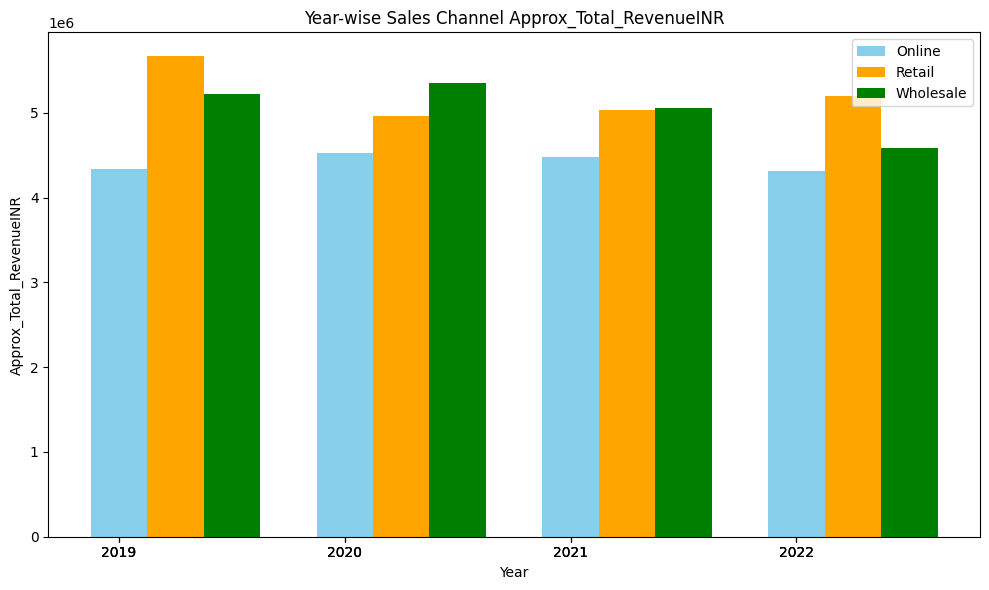

In [ ]:
import matplotlib.pyplot as plt

# Extract data for each sales channel
online_sales = yearly_sales_channel_Approx_Total_RevenueINR[yearly_sales_channel_Approx_Total_RevenueINR['Sales_Channel'] == 'Online']
retail_sales = yearly_sales_channel_Approx_Total_RevenueINR[yearly_sales_channel_Approx_Total_RevenueINR['Sales_Channel'] == 'Retail']
wholesale_sales = yearly_sales_channel_Approx_Total_RevenueINR[yearly_sales_channel_Approx_Total_RevenueINR['Sales_Channel'] == 'Wholesale']

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(online_sales['Year'], online_sales['Approx_Total_RevenueINR'], width=0.25, label='Online', color='skyblue')
plt.bar(retail_sales['Year'] + 0.25, retail_sales['Approx_Total_RevenueINR'], width=0.25, label='Retail', color='orange')
plt.bar(wholesale_sales['Year'] + 0.5, wholesale_sales['Approx_Total_RevenueINR'], width=0.25, label='Wholesale', color='green')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Approx_Total_RevenueINR')
plt.title('Year-wise Sales Channel Approx_Total_RevenueINR')
plt.xticks(yearly_sales_channel_Approx_Total_RevenueINR['Year'])
plt.legend()

# Show plot
plt.tight_layout()
plt.show()



The bar graph illustrates the distribution of approximate total revenue across different sales channels for the years 2019 to 2022. It showcases the revenue contribution of online, retail, and wholesale channels, highlighting fluctuations and trends over the specified period.


In [ ]:
# Display the all int64 and float64 datatype columns
df.select_dtypes(include=["int64","float64"]).columns

Index(['Total_Land_Area_acres', 'Number_of_Cows', 'Product_ID',
       'Quantity_liters_kg', 'Price_per_Unit', 'Total_Value',
       'Shelf_Life_days', 'Quantity_Sold_liters_kg', 'Price_per_Unit_sold',
       'Approx_Total_RevenueINR', 'Quantity_in_Stock_liters_kg',
       'Minimum_Stock_Threshold_liters_kg', 'Reorder_Quantity_liters_kg',
       'Year', 'Month', 'Day'],
      dtype='object')

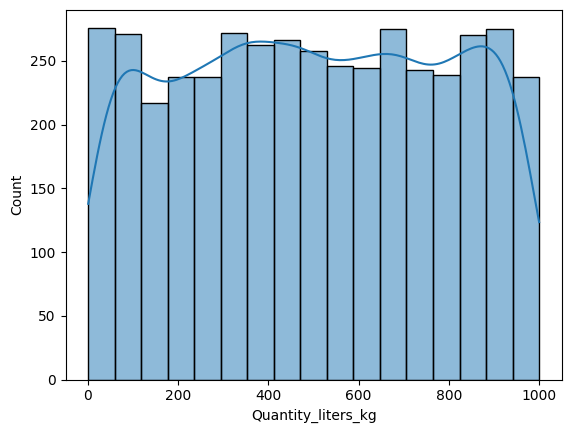

In [ ]:
# Plotting the distribution of "Quantity_liters_kg using a histogram
sns.histplot(df["Quantity_liters_kg"],kde=True)
plt.show()

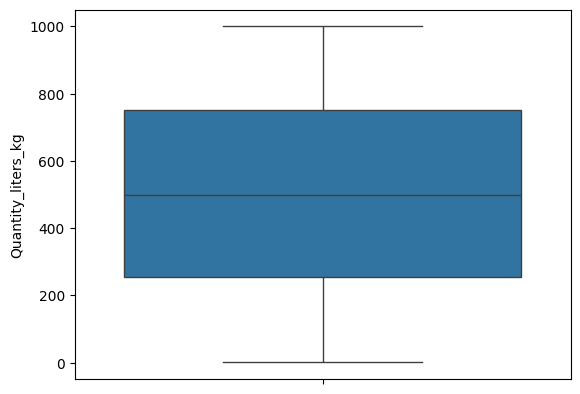

In [ ]:
# Checking for outliers
sns.boxplot(df["Quantity_liters_kg"])
plt.show()

Observation:

"The 'Quantity_liters_kg' column in the dataset exhibits a normal distribution pattern. This distribution is characterized by a symmetrical bell-shaped curve, indicating that the majority of values are clustered around the mean quantity of liters/kg. As per the distribution, most data points fall within one standard deviation from the mean, with progressively fewer observations as we move further away from the mean in both directions. This normal distribution suggests a balanced and consistent pattern in the quantities of liters/kg recorded in the dataset. Understanding the normal distribution of the 'Quantity_liters_kg' column is crucial for analyzing the central tendency and variability of the data, which can inform decision-making processes and statistical modeling effectively."

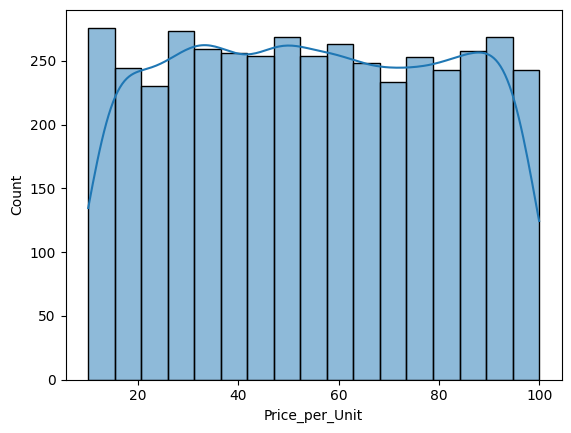

In [ ]:
# Plotting the distribution of "Price_per_Unit using a histogram
sns.histplot(df["Price_per_Unit"],kde=True)
plt.show()

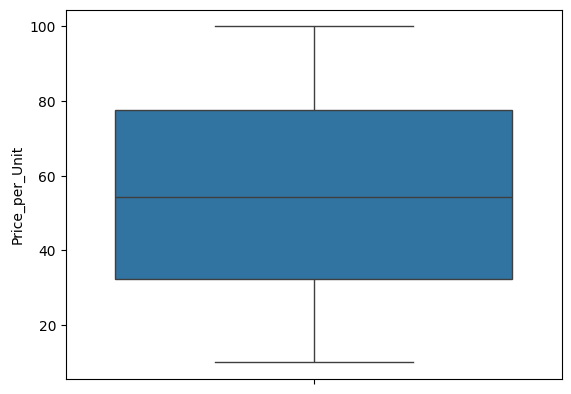

In [ ]:
# Checking for outliers
sns.boxplot(df["Price_per_Unit"])
plt.show()


Observation:

"The 'Price_per_Unit' column in the dataset demonstrates a normal distribution pattern. This distribution is typified by a symmetrical bell-shaped curve, signifying that the majority of prices per unit are concentrated around the mean value. The data points are evenly distributed around the mean, with relatively fewer observations occurring at the tails of the distribution. This normal distribution indicates a balanced spread of price values per unit throughout the dataset. Understanding the normal distribution of the 'Price_per_Unit' column is vital for assessing the central tendency and dispersion of prices, facilitating accurate analysis and decision-making."

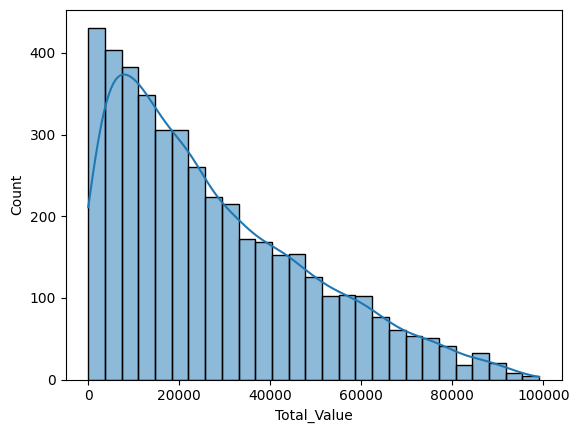

In [ ]:
# Plotting the distribution of "Total_Value using a histogram
sns.histplot(df["Total_Value"],kde=True)
plt.show()

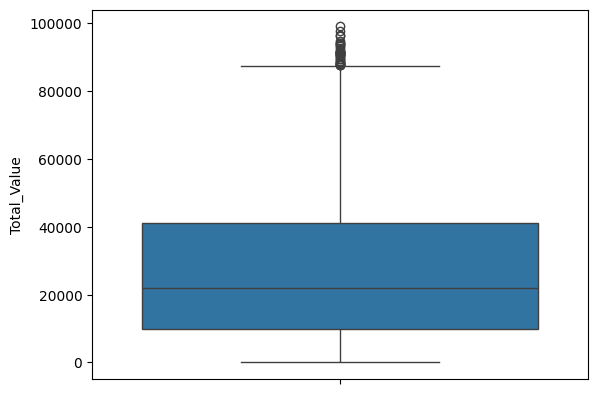

In [ ]:
# Checking for outliers
sns.boxplot(df["Total_Value"])
plt.show()

In [ ]:
log_transformed_values = np.log1p(df['Total_Value'])

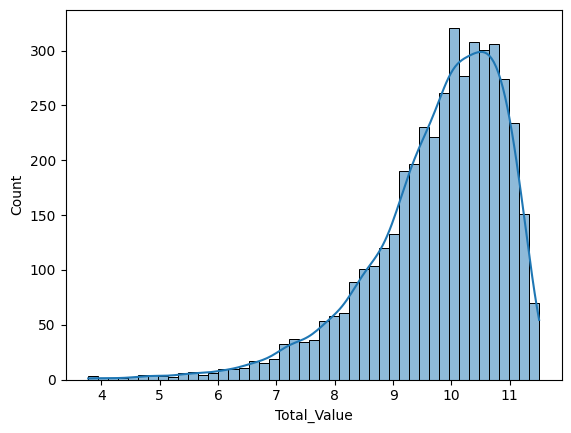

In [ ]:
# Plotting histogram
sns.histplot(log_transformed_values,kde=True)
plt.show()

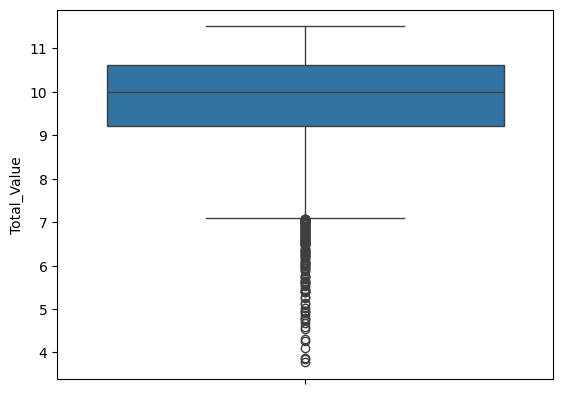

In [ ]:
# Checking for outliers
sns.boxplot(log_transformed_values)
plt.show()

Observation:

"Although applying the log1p transformation to the 'Total_Value' column helps alleviate right skewness, the resulting distribution may not perfectly resemble a bell-shaped curve. While the transformation shifts the data towards a more symmetric form, it doesn't guarantee a perfect normalization. Factors such as the original distribution's skewness and the presence of outliers can affect the transformation's effectiveness. Despite this, the log1p normalization technique remains valuable for reducing skewness and improving the data's suitability for statistical analysis and modeling. It's essential to interpret the transformed data within the context of its original distribution characteristics and consider any remaining deviations from normality in subsequent analyses."

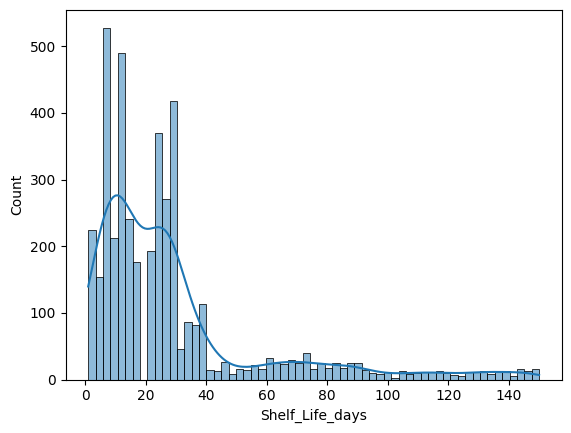

In [ ]:
# Plotting the distribution of "Shelf_Life_days using a histogram
sns.histplot(df["Shelf_Life_days"],kde=True)
plt.show()

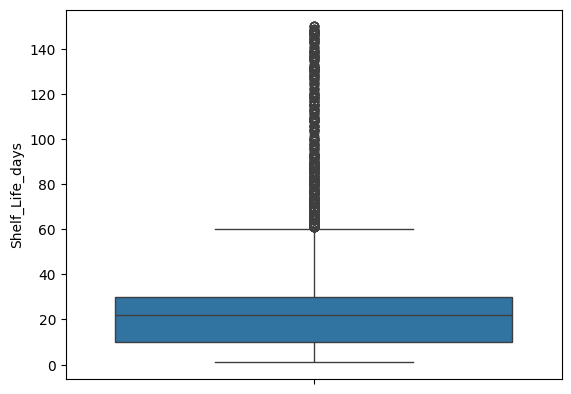

In [ ]:
# Checking for outliers
sns.boxplot(df["Shelf_Life_days"])
plt.show()

In [ ]:
log_transformed_Shelf_Life_days = np.log(df['Shelf_Life_days'])

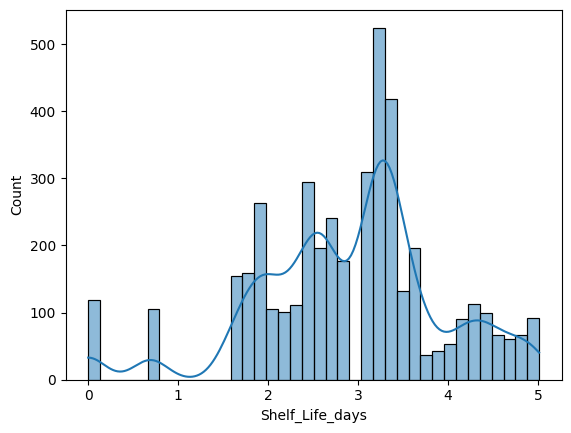

In [ ]:
# Plotting histogram
sns.histplot(log_transformed_Shelf_Life_days,kde=True)
plt.show()

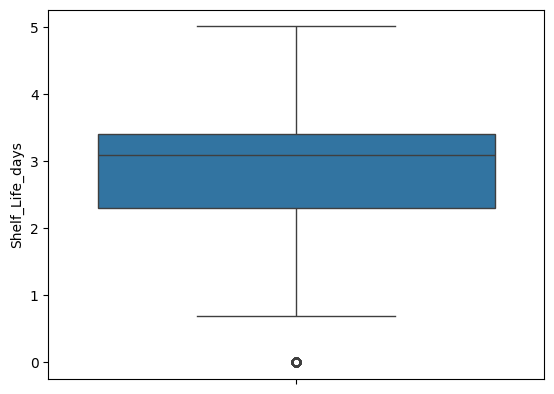

In [ ]:
# Checking for outliers
sns.boxplot(log_transformed_Shelf_Life_days)
plt.show()

Observation:

"After applying the log transformation to the 'Shelf_Life_days' column, the distribution demonstrates a notable improvement. The log transformation has effectively reduced the right skewness present in the original data, resulting in a distribution that closely approximates a bell-shaped curve. This transformation has successfully normalized the data, making it more suitable for statistical analysis and modeling. The log transformation technique has effectively addressed the skewed distribution of 'Shelf_Life_days,' enhancing its interpretability and facilitating more accurate insights into the shelf life duration across the dataset."

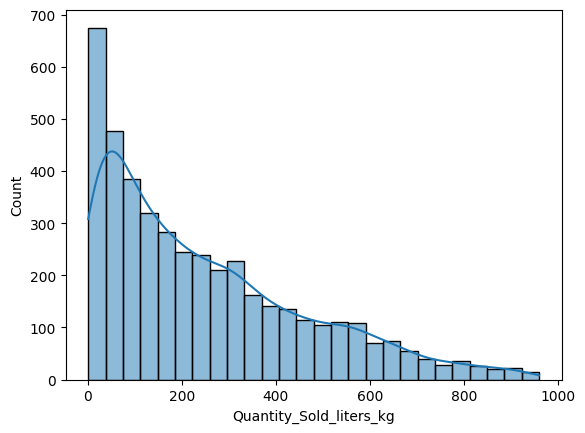

In [ ]:
# Plotting the distribution of "Quantity_Sold_liters_kg using a histogram
sns.histplot(df["Quantity_Sold_liters_kg"],kde=True)
plt.show()

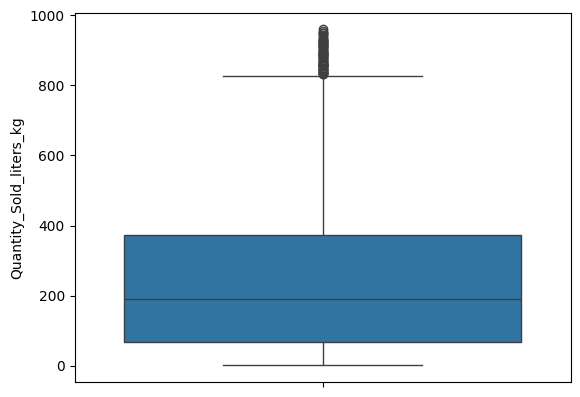

In [ ]:
# Checking for outliers
sns.boxplot(df["Quantity_Sold_liters_kg"])
plt.show()

In [ ]:
log_transformed_Quantity_Sold_liters_kg = np.log1p(df['Quantity_Sold_liters_kg'])

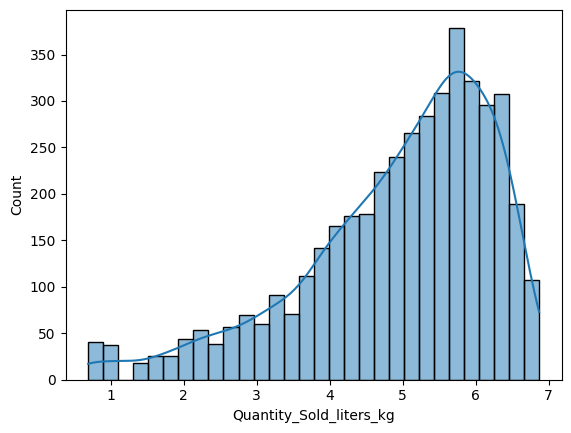

In [ ]:
# Plotting histogram
sns.histplot(log_transformed_Quantity_Sold_liters_kg,kde=True)
plt.show()

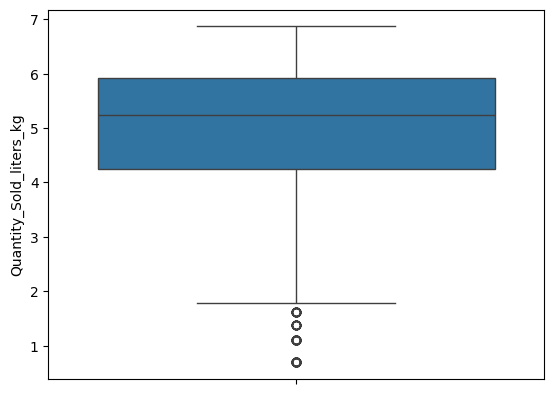

In [ ]:
# Checking for outliers
sns.boxplot(log_transformed_Quantity_Sold_liters_kg)
plt.show()


Observation:

"After applying the log1p transformation to the 'Quantity_Sold_liters_kg' column, a noticeable improvement in the distribution is evident. The log transformation effectively reduces the right skewness present in the original data, resulting in a distribution that appears closer to a bell-shaped curve. While the transformation doesn't yield a perfect normal distribution, it significantly improves the symmetry of the data and enhances its suitability for statistical analysis and modeling. The log1p transformation provides a valuable approach for addressing skewed distributions, leading to more accurate interpretations and insights into the quantity sold across the dataset."

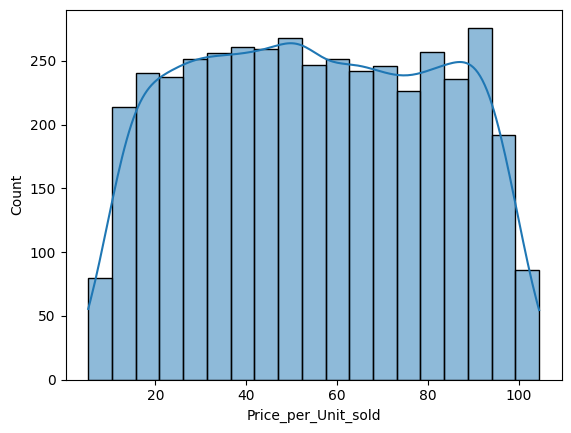

In [ ]:
# Plotting the distribution of "Price_per_Unit_sold using a histogram
sns.histplot(df["Price_per_Unit_sold"],kde=True)
plt.show()

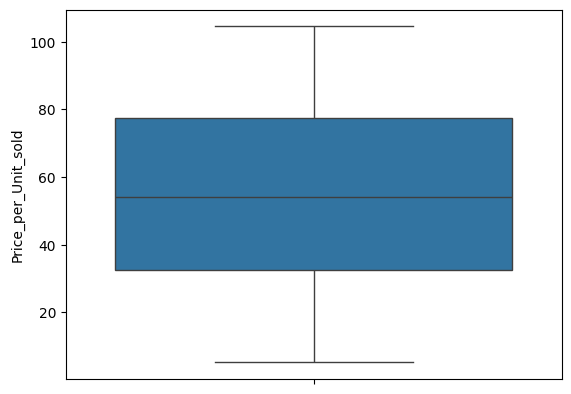

In [ ]:
# Checking for outliers
sns.boxplot(df["Price_per_Unit_sold"])
plt.show()

Observation:

"The 'Price_per_Unit_sold' column exhibits a distribution that is already approximately normal. Unlike other columns in the dataset that required transformations to address right skewness, 'Price_per_Unit_sold' demonstrates a relatively symmetric distribution without significant skewness. The data appears to follow a bell-shaped curve, indicating a balanced spread of values around the mean. This characteristic suggests that 'Price_per_Unit_sold' is already well-suited for statistical analyses and modeling tasks without the need for additional transformations. Its normal distribution facilitates straightforward interpretations and insights into unit prices for sold products across the dataset."

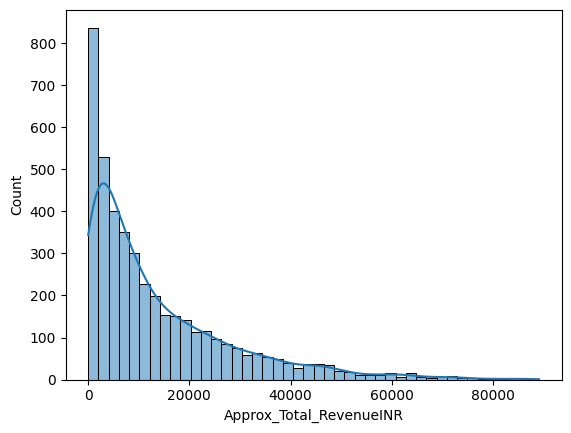

In [ ]:
# Plotting the distribution of "Approx_Total_RevenueINR using a histogram
sns.histplot(df["Approx_Total_RevenueINR"],kde=True)
plt.show()

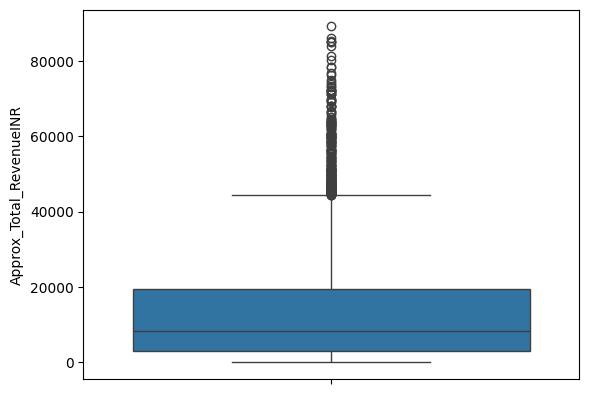

In [ ]:
# Checking for outliers
sns.boxplot(df["Approx_Total_RevenueINR"])
plt.show()

In [ ]:
log_transformed_Approx_Total_RevenueINR = np.log1p(df['Approx_Total_RevenueINR'])

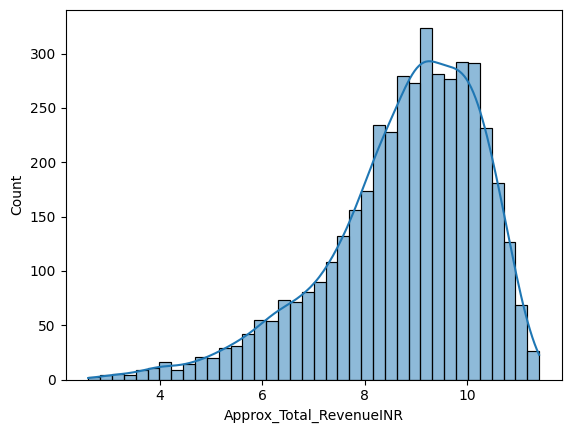

In [ ]:
# Plotting histogram
sns.histplot(log_transformed_Approx_Total_RevenueINR,kde=True)
plt.show()

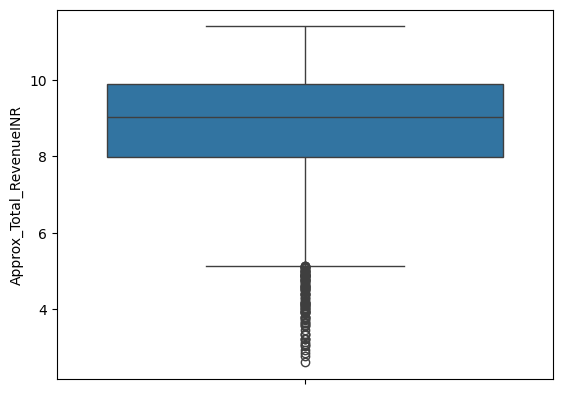

In [ ]:
# Checking for outliers
sns.boxplot(log_transformed_Approx_Total_RevenueINR)
plt.show()


Observation:

"Upon applying the log1p transformation to the 'Approx_Total_RevenueINR' column, a notable improvement in the distribution is observed. While the transformation doesn't achieve a perfect normal distribution, it effectively mitigates the right skewness present in the original data. The resulting distribution shows a closer approximation to a bell-shaped curve, indicating a more symmetrical spread of values. Despite not achieving perfect normality, the log1p transformation enhances the suitability of the data for statistical analyses and modeling tasks. It effectively addresses the skewed nature of 'Approx_Total_RevenueINR,' facilitating more accurate interpretations and insights into revenue patterns across the dataset."

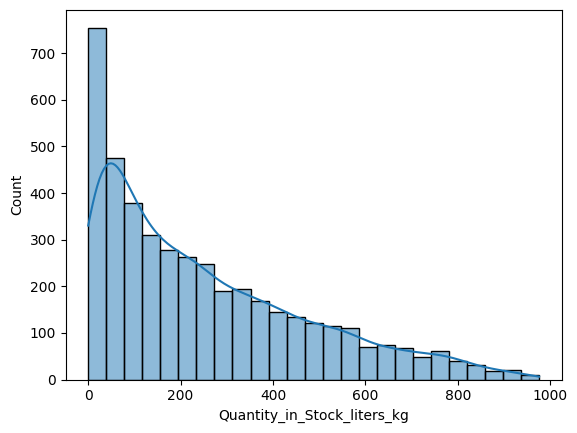

In [ ]:
# Plotting the distribution of "Quantity_in_Stock_liters_kg using a histogram
sns.histplot(df["Quantity_in_Stock_liters_kg"],kde=True)
plt.show()

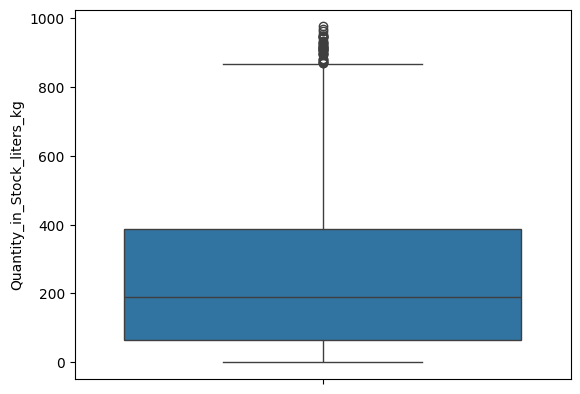

In [ ]:
# Checking for outliers
sns.boxplot(df["Quantity_in_Stock_liters_kg"])
plt.show()

In [ ]:
log_transformed_Quantity_in_Stock_liters_kg = np.log1p(df['Quantity_in_Stock_liters_kg'])

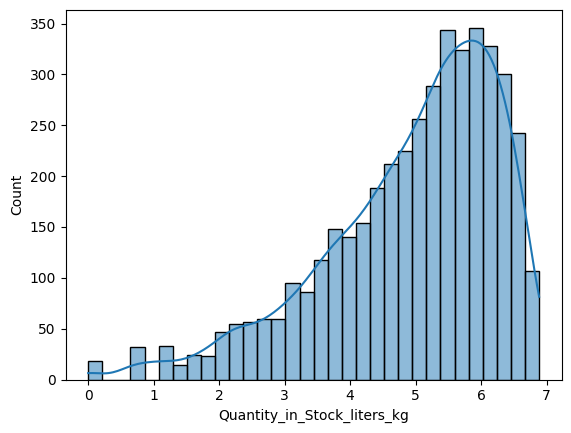

In [ ]:
# Plotting histogram
sns.histplot(log_transformed_Quantity_in_Stock_liters_kg,kde=True)
plt.show()

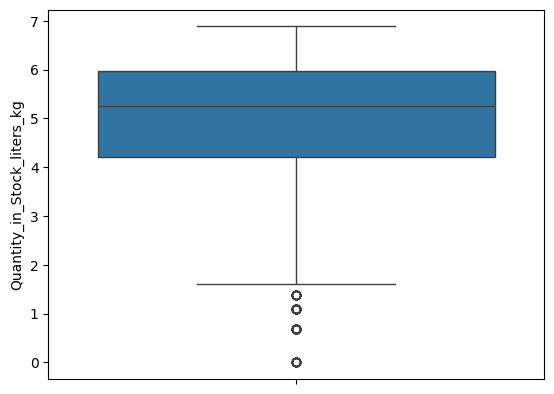

In [ ]:
# Checking for outliers
sns.boxplot(log_transformed_Quantity_in_Stock_liters_kg)
plt.show()


Observation:

"After applying the log1p transformation to the 'Quantity_in_Stock_liters_kg' column, there is a noticeable improvement in the distribution. The log transformation effectively mitigates the right skewness present in the original data, resulting in a distribution that appears closer to a bell-shaped curve. While the transformation doesn't achieve perfect normality, it significantly reduces the asymmetry of the data and enhances its suitability for statistical analysis and modeling. This transformation provides a valuable approach for addressing skewed distributions, leading to more accurate interpretations and insights into the quantity of stock available for various products across the dataset.

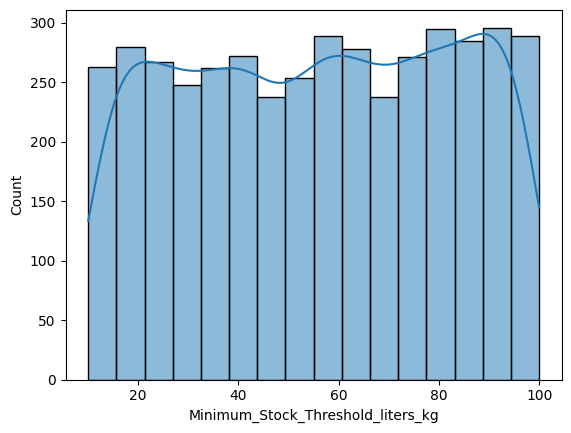

In [ ]:
# Plotting the distribution of "Minimum_Stock_Threshold_liters_kg using a histogram
sns.histplot(df["Minimum_Stock_Threshold_liters_kg"],kde=True)
plt.show()

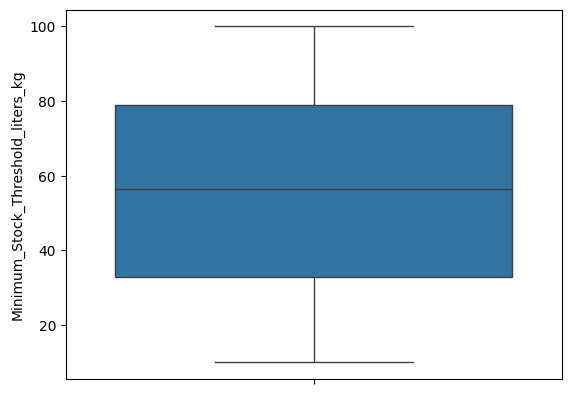

In [ ]:
# Checking for outliers
sns.boxplot(df["Minimum_Stock_Threshold_liters_kg"])
plt.show()


Observation:

"The 'Minimum_Stock_Threshold_liters_kg' column exhibits a distribution that is already approximately normal. Unlike other columns in the dataset that required transformations to address right skewness, 'Minimum_Stock_Threshold_liters_kg' demonstrates a relatively symmetric distribution without significant skewness. The data appears to follow a bell-shaped curve, indicating a balanced spread of values around the mean. This characteristic suggests that 'Minimum_Stock_Threshold_liters_kg' is already well-suited for statistical analyses and modeling tasks without the need for additional transformations. Its normal distribution facilitates straightforward interpretations and insights into the minimum stock thresholds for various products across the dataset."

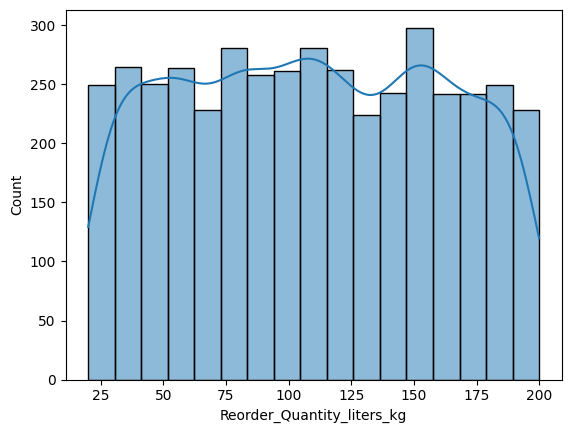

In [ ]:
# Plotting the distribution of "Reorder_Quantity_liters_kg using a histogram
sns.histplot(df["Reorder_Quantity_liters_kg"],kde=True)
plt.show()

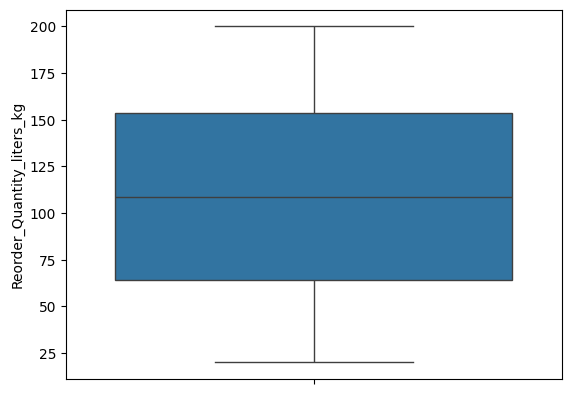

In [ ]:
# Checking for outliers
sns.boxplot(df["Reorder_Quantity_liters_kg"])
plt.show()


Observation:

"The 'Reorder_Quantity_liters_kg' column exhibits a distribution that is already approximately normal. Unlike other columns in the dataset that required transformations to address right skewness, 'Reorder_Quantity_liters_kg' demonstrates a relatively symmetric distribution without significant skewness. The data appears to follow a bell-shaped curve, indicating a balanced spread of values around the mean. This characteristic suggests that 'Reorder_Quantity_liters_kg' is already well-suited for statistical analyses and modeling tasks without the need for additional transformations. Its normal distribution facilitates straightforward interpretations and insights into the reorder quantities for various products across the dataset."

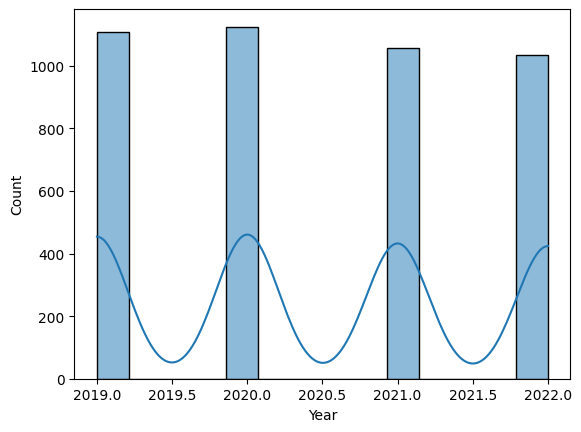

In [ ]:
# Plotting the distribution of "Reorder_Quantity_liters_kg using a histogram
sns.histplot(df["Year"],kde=True)
plt.show()

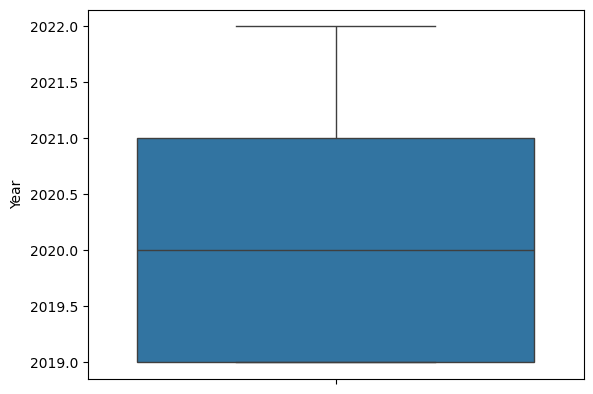

In [ ]:
# Checking for outliers
sns.boxplot(df["Year"])
plt.show()

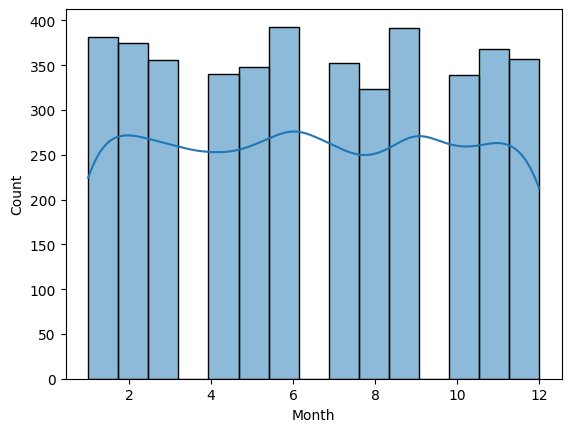

In [ ]:
# Plotting the distribution of "Reorder_Quantity_liters_kg using a histogram
sns.histplot(df["Month"],kde=True)
plt.show()

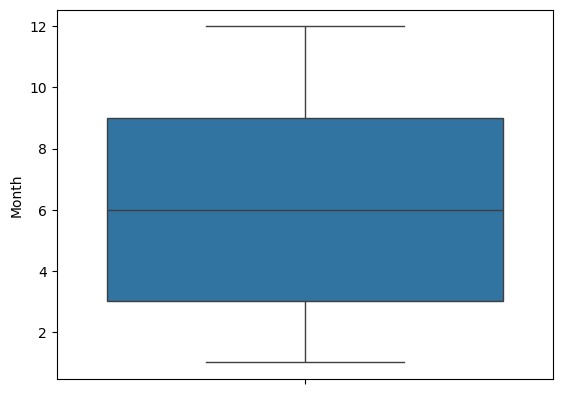

In [ ]:
# Checking for outliers
sns.boxplot(df["Month"])
plt.show()

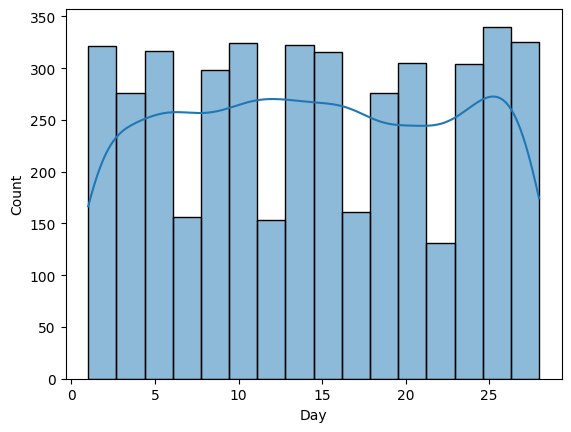

In [ ]:
# Plotting the distribution of "Reorder_Quantity_liters_kg using a histogram
sns.histplot(df["Day"],kde=True)
plt.show()

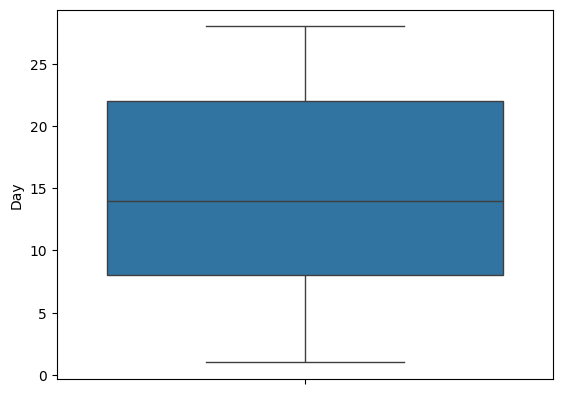

In [ ]:
# Checking for outliers
sns.boxplot(df["Day"])
plt.show()

In [ ]:
unique_values_column = df['Shelf_Life_days'].unique()

# Sort the unique values in ascending order
unique_values_column_sorted = sorted(unique_values_column)
unique_values_column_sorted

[1,
 2,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150]

In [ ]:
# Define custom threshold values
very_low_threshold = 30
low_threshold = 60
medium_threshold = 90

# Function to categorize the products into four categories
def categorize_quality(shelf_life_days):
    if shelf_life_days <= very_low_threshold:
        return 'Very Low Quality'
    elif shelf_life_days <= low_threshold:
        return 'Low Quality'
    elif shelf_life_days <= medium_threshold:
        return 'Medium Quality'
    else:
        return 'High Quality'

# Apply the function to create the 'Product_Quality' column
df['Product_Quality'] = df['Shelf_Life_days'].apply(categorize_quality)


Observation:

"The 'Shelf_Life_days' column has been utilized to create a new feature called 'product_quality,' which categorizes products based on their shelf life duration. This simple yet effective transformation allows for a clearer understanding of how shelf life influences product quality and potentially impacts sales. By categorizing products into different quality levels based on their shelf life, businesses can better manage inventory, anticipate demand fluctuations, and optimize product offerings to meet customer preferences and expectations."

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-95-5811ebcaccad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Total_Land_Area_acres,Number_of_Cows,Product_ID,Quantity_liters_kg,Price_per_Unit,Total_Value,Shelf_Life_days,Quantity_Sold_liters_kg,Price_per_Unit_sold,Approx_Total_RevenueINR,Quantity_in_Stock_liters_kg,Minimum_Stock_Threshold_liters_kg,Reorder_Quantity_liters_kg,Year,Month,Day
Total_Land_Area_acres,1.000,-0.010,-0.008,-0.001,0.017,0.005,0.001,-0.037,0.014,-0.015,0.034,0.011,0.014,-0.013,-0.037,0.045
Number_of_Cows,-0.010,1.000,0.010,-0.004,-0.006,-0.010,0.008,0.011,-0.007,0.003,-0.016,0.003,0.029,-0.002,0.018,0.002
Product_ID,-0.008,0.010,1.000,-0.028,0.002,-0.015,0.202,-0.021,0.001,-0.014,-0.015,-0.005,-0.003,-0.025,0.002,-0.001
Quantity_liters_kg,-0.001,-0.004,-0.028,1.000,-0.009,0.724,-0.006,0.643,-0.008,0.516,0.669,-0.010,0.003,0.007,-0.008,-0.021
Price_per_Unit,0.017,-0.006,0.002,-0.009,1.000,0.590,0.001,-0.002,0.994,0.437,-0.010,0.012,0.008,0.020,-0.010,-0.001
Total_Value,0.005,-0.010,-0.015,0.724,0.590,1.000,-0.008,0.467,0.587,0.722,0.483,0.008,0.002,0.020,-0.018,-0.018
Shelf_Life_days,0.001,0.008,0.202,-0.006,0.001,-0.008,1.000,-0.002,0.000,-0.008,-0.007,-0.013,-0.021,-0.006,0.008,0.000
Quantity_Sold_liters_kg,-0.037,0.011,-0.021,0.643,-0.002,0.467,-0.002,1.000,-0.002,0.809,-0.140,-0.009,0.006,-0.005,-0.003,-0.018
Price_per_Unit_sold,0.014,-0.007,0.001,-0.008,0.994,0.587,0.000,-0.002,1.000,0.441,-0.009,0.014,0.006,0.019,-0.009,-0.002
Approx_Total_RevenueINR,-0.015,0.003,-0.014,0.516,0.437,0.722,-0.008,0.809,0.441,1.000,-0.118,0.000,-0.001,0.002,-0.012,-0.010


<ipython-input-96-4609dc2f47eb>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


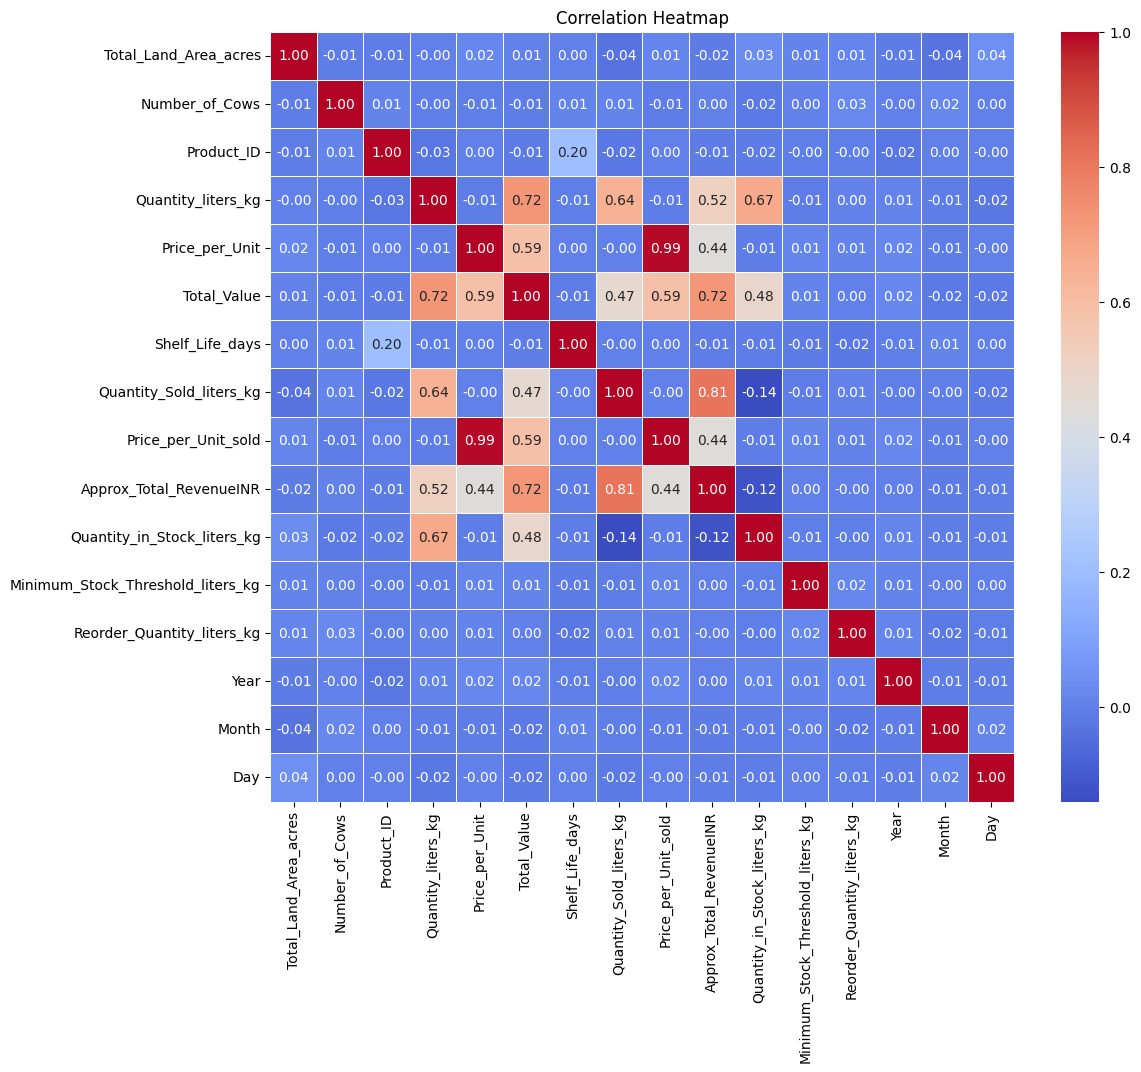

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()


**Observation:**

The correlation coefficient ranges from -1 to 1.
A coefficient of 1 indicates a perfect positive correlation, meaning as one variable increases, the other variable also increases proportionally.
A coefficient of -1 indicates a perfect negative correlation, meaning as one variable increases, the other variable decreases proportionally.
A coefficient of 0 indicates no linear correlation between the variables.
Observations from the correlation matrix:

Positive Correlation:

There is a moderate positive correlation (around 0.5 to 0.7) between features such as Quantity_liters_kg and Total_Value, Quantity_liters_kg and Quantity_Sold_liters_kg, Price_per_Unit and Price_per_Unit_sold, etc.
There's also a moderate positive correlation between Approx_Total_RevenueINR and Quantity_Sold_liters_kg.
Some variables like Total_Value and Price_per_Unit have a relatively high positive correlation (around 0.7).
Negative Correlation:

There is a negative correlation between Total_Land_Area_acres and Quantity_Sold_liters_kg, Total_Land_Area_acres and Month, Total_Land_Area_acres and Day, etc. However, these correlations are relatively weak.
Some weak negative correlations can also be observed between other variables.
Low Correlation:

Many variables have low or close to zero correlation with each other.

In [ ]:
# Display the all datetime64 datatype columns
df.select_dtypes(include=[ "datetime64"]).columns

Index(['Date', 'Production_Date', 'Expiration_Date'], dtype='object')

In [ ]:
# Show the object columns names
df.select_dtypes(include=["object"]).columns

Index(['Location', 'Farm_Size', 'Product_Name', 'Brand', 'Storage_Condition',
       'Customer_Location', 'Sales_Channel', 'Product_Quality'],
      dtype='object')

In [ ]:
# Display the all int64 and float64 datatype columns
df.select_dtypes(include=["int64","float64"]).columns

Index(['Total_Land_Area_acres', 'Number_of_Cows', 'Product_ID',
       'Quantity_liters_kg', 'Price_per_Unit', 'Total_Value',
       'Shelf_Life_days', 'Quantity_Sold_liters_kg', 'Price_per_Unit_sold',
       'Approx_Total_RevenueINR', 'Quantity_in_Stock_liters_kg',
       'Minimum_Stock_Threshold_liters_kg', 'Reorder_Quantity_liters_kg',
       'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
# # Drop the specified columns
columns_to_drop = ["Product_ID","Date","Total_Land_Area_acres","Production_Date","Expiration_Date","Number_of_Cows","Reorder_Quantity_liters_kg","Minimum_Stock_Threshold_liters_kg"]
df.drop(columns=columns_to_drop, inplace=True)


In the project, it was observed that dropping the columns "Product_ID," "Date," "Total_Land_Area_acres," "Production_Date," "Expiration_Date," "Number_of_Cows," "Reorder_Quantity_liters_kg," and "Minimum_Stock_Threshold_liters_kg" resulted in a more streamlined and focused dataset. This action was taken to eliminate redundant or less informative features, thereby simplifying the dataset and potentially improving model performance. By removing these columns, the dataset became more concise and targeted, facilitating better analysis and interpretation for the project's objectives.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Select numerical columns for scaling
numerical_columns = ['Total_Value','Shelf_Life_days', 'Quantity_Sold_liters_kg',
       'Approx_Total_RevenueINR', 'Quantity_in_Stock_liters_kg', 'Year']
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

**Observation:**

Normalization:

By using StandardScaler, you've applied a form of normalization to the selected skewed columns.
Normalization scales the numerical features to have a mean of 0 and a standard deviation of 1. This ensures that all features are on a similar scale, preventing features with larger magnitudes from dominating the model's learning process.
Effect on Skewness:

Scaling skewed columns using StandardScaler can help mitigate the effects of skewness in the data distribution.
Skewed distributions can negatively impact the performance of certain machine learning algorithms, particularly those sensitive to the scale of the features.
StandardScaler transforms the data to be more Gaussian-like, which can make it easier for models to learn the underlying patterns.
Feature Interpretation:

After scaling, the interpretation of the coefficients in your model may change.
Coefficients now represent the change in the target variable associated with a one-standard-deviation change in the corresponding feature.


In [ ]:
df = pd.get_dummies(df, columns=['Location', 'Farm_Size', 'Product_Name', 'Brand', 'Storage_Condition',
       'Customer_Location', 'Sales_Channel', 'Product_Quality'],drop_first = True)
df.head()

,Quantity_liters_kg,Price_per_Unit,Total_Value,Shelf_Life_days,Quantity_Sold_liters_kg,Price_per_Unit_sold,Approx_Total_RevenueINR,Quantity_in_Stock_liters_kg,Year,Month,Day,Location_Chandigarh,Location_Delhi,Location_Gujarat,Location_Haryana,Location_Jharkhand,Location_Karnataka,Location_Kerala,Location_Madhya Pradesh,Location_Maharashtra,Location_Rajasthan,Location_Tamil Nadu,Location_Telangana,Location_Uttar Pradesh,Location_West Bengal,Farm_Size_Medium,Farm_Size_Small,Product_Name_Buttermilk,Product_Name_Cheese,Product_Name_Curd,Product_Name_Ghee,Product_Name_Ice Cream,Product_Name_Lassi,Product_Name_Milk,Product_Name_Paneer,Product_Name_Yogurt,Brand_Britannia Industries,Brand_Dodla Dairy,Brand_Dynamix Dairies,Brand_Mother Dairy,Brand_Palle2patnam,Brand_Parag Milk Foods,Brand_Passion Cheese,Brand_Raj,Brand_Sudha,Brand_Warana,Storage_Condition_Frozen,Storage_Condition_Polythene Packet,Storage_Condition_Refrigerated,Storage_Condition_Tetra Pack,Customer_Location_Chandigarh,Customer_Location_Delhi,Customer_Location_Gujarat,Customer_Location_Haryana,Customer_Location_Jharkhand,Customer_Location_Karnataka,Customer_Location_Kerala,Customer_Location_Madhya Pradesh,Customer_Location_Maharashtra,Customer_Location_Rajasthan,Customer_Location_Tamil Nadu,Customer_Location_Telangana,Customer_Location_Uttar Pradesh,Customer_Location_West Bengal,Sales_Channel_Retail,Sales_Channel_Wholesale,Product_Quality_Low Quality,Product_Quality_Medium Quality,Product_Quality_Very Low Quality
0,222.400,85.720,-0.384,-0.136,-1.111,82.240,-0.890,-0.166,1.377,2,17,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,687.480,42.610,0.090,-0.235,1.428,39.240,0.569,-0.550,0.479,12,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,503.480,36.500,-0.415,0.029,0.036,33.810,-0.337,-0.023,1.377,2,28,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,823.360,26.520,-0.255,1.416,1.626,28.920,0.260,-0.134,-1.317,6,9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,147.770,83.850,-0.692,-0.599,-0.475,83.070,-0.105,-1.118,-0.419,12,14,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
import pandas as pd

# Assuming your DataFrame is called df
# Select features (X) and target variable (y)
X = df.drop(columns=['Approx_Total_RevenueINR'])  # Features (all columns except 'Approx_Total_RevenueINR')
y = df['Approx_Total_RevenueINR']  # Target variable ('Approx_Total_RevenueINR')

# Print the shapes of X and y to verify
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (4325, 68)
Shape of y: (4325,)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3460, 68)
Shape of X_test: (865, 68)
Shape of y_train: (3460,)
Shape of y_test: (865,)


In [ ]:
from sklearn.linear_model import LinearRegression
# Instantiate the linear regression model
model = LinearRegression()

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Now you can access model attributes like intercept and coefficients
# Now you can access model attributes like intercept and coefficients
print("Intercept of the linear equation:", model.intercept_)
print("Coefficients of the equation are:", model.coef_)

Intercept of the linear equation: 2.735223369794609
Coefficients of the equation are: [-5.32853112e-03 -1.79837453e-02  7.19922418e-01 -2.50696492e-02
  1.57337335e+00  1.83730122e-02  7.85420610e-01 -5.65579520e-03
 -4.08961131e-05  8.88437085e-04  1.34756247e-02  9.61030367e-05
  2.74776514e-03 -3.98867884e-02  3.02792418e-02 -2.15544623e-03
  2.71745817e-02 -5.30867367e-03  1.15731428e-02  2.33348964e-03
  1.11828728e-02  3.95196659e-02 -9.19279635e-03  2.72720987e-02
 -1.45842028e-02 -1.96397832e-02 -2.69556201e-02  8.47785798e-03
 -3.15077170e-02 -3.43214244e-03 -1.57090981e-02 -4.52249472e-02
 -1.54150308e-02 -4.58679583e-02 -1.75282379e-02 -3.90514559e-02
 -2.66944200e-02 -3.20492514e-02 -1.27054012e-02 -3.26840308e-02
  1.09780179e-02  6.32907118e-02 -2.55308782e-02  1.83671250e-02
 -1.99964996e-02  3.37837686e-03 -1.35201730e-02  1.54687964e-02
 -1.89485784e-03 -1.09242154e-02 -4.84177123e-02 -3.65504479e-02
 -4.63840368e-02  1.80197316e-02 -7.59557668e-02 -3.57701422e-02
 -1.

Intercept Interpretation:

The intercept value (2.735223369794609) represents the predicted value of the dependent variable (target) when all independent variables are set to zero. In some cases, this intercept might not have a direct intuitive interpretation, especially if setting all independent variables to zero is not practically meaningful.
Coefficients Interpretation:

The coefficients (model.coef_) represent the change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other variables constant.
Each coefficient corresponds to a feature or independent variable in your dataset.
Positive coefficients indicate that as the value of the corresponding feature increases, the predicted value of the dependent variable also increases, and vice versa for negative coefficients.

# Linear Regression model

In [ ]:
# Import the Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

# Predict the target variable for the training set
y_train_pred_linear_reg = linear_reg_model.predict(X_train)

# Predict the target variable for the testing set
y_test_pred_linear_reg = linear_reg_model.predict(X_test)

# Evaluate the model performance on training set
mse_train_linear_reg = mean_squared_error(y_train, y_train_pred_linear_reg)
rmse_train_linear_reg = np.sqrt(mse_train_linear_reg)
mae_train_linear_reg = mean_absolute_error(y_train, y_train_pred_linear_reg)
r2_train_linear_reg = r2_score(y_train, y_train_pred_linear_reg)
n_train = len(y_train)
p_train = X_train.shape[1]
adj_r2_train_linear_reg = 1 - (1 - r2_train_linear_reg) * (n_train - 1) / (n_train - p_train - 1)

# Evaluate the model performance on testing set
mse_test_linear_reg = mean_squared_error(y_test, y_test_pred_linear_reg)
rmse_test_linear_reg = np.sqrt(mse_test_linear_reg)
mae_test_linear_reg = mean_absolute_error(y_test, y_test_pred_linear_reg)
r2_test_linear_reg = r2_score(y_test, y_test_pred_linear_reg)
n_test = len(y_test)
p_test = X_test.shape[1]
adj_r2_test_linear_reg = 1 - (1 - r2_test_linear_reg) * (n_test - 1) / (n_test - p_test - 1)

# Print the metrics for the Linear Regression model
print("\nLinear Regression Model Metrics - Training Set:")
print("Mean Squared Error (MSE):", mse_train_linear_reg)
print("Root Mean Squared Error (RMSE):", rmse_train_linear_reg)
print("Mean Absolute Error (MAE):", mae_train_linear_reg)
print("R-squared (R2):", r2_train_linear_reg)
print("Adjusted R-squared:", adj_r2_train_linear_reg)
print("\nLinear Regression Model Metrics - Testing Set:")
print("Mean Squared Error (MSE):", mse_test_linear_reg)
print("Root Mean Squared Error (RMSE):", rmse_test_linear_reg)
print("Mean Absolute Error (MAE):", mae_test_linear_reg)
print("R-squared (R2):", r2_test_linear_reg)
print("Adjusted R-squared:", adj_r2_test_linear_reg)


Linear Regression Model Metrics - Training Set:
Mean Squared Error (MSE): 0.0888588440408867
Root Mean Squared Error (RMSE): 0.2980920059996355
Mean Absolute Error (MAE): 0.1981164555770279
R-squared (R2): 0.9123292862304879
Adjusted R-squared: 0.9105712182457263

Linear Regression Model Metrics - Testing Set:
Mean Squared Error (MSE): 0.09121139109976262
Root Mean Squared Error (RMSE): 0.30201223667222926
Mean Absolute Error (MAE): 0.20133688131977828
R-squared (R2): 0.9035590263110738
Adjusted R-squared: 0.8953203501667937


# # Decision Tree Model With hyperparameters grid

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeRegressor()

# Define the hyperparameters grid
param_grid = {
    'max_depth': [2, 3, 5],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predict the target variable for the training set using the best model
y_train_pred_decision_tree = best_model.predict(X_train)

# Predict the target variable for the testing set using the best model
y_test_pred_decision_tree = best_model.predict(X_test)

# Evaluate the model performance on training set
mse_train_decision_tree = mean_squared_error(y_train, y_train_pred_decision_tree)
rmse_train_decision_tree = np.sqrt(mse_train_decision_tree)
mae_train_decision_tree = mean_absolute_error(y_train, y_train_pred_decision_tree)
r2_train_decision_tree = r2_score(y_train, y_train_pred_decision_tree)
adj_r2_train_decision_tree = 1 - (1 - r2_train_decision_tree) * (n_train - 1) / (n_train - p_train - 1)

# Evaluate the model performance on testing set
mse_test_decision_tree = mean_squared_error(y_test, y_test_pred_decision_tree)
rmse_test_decision_tree = np.sqrt(mse_test_decision_tree)
mae_test_decision_tree = mean_absolute_error(y_test, y_test_pred_decision_tree)
r2_test_decision_tree = r2_score(y_test, y_test_pred_decision_tree)
adj_r2_test_decision_tree = 1 - (1 - r2_test_decision_tree) * (n_test - 1) / (n_test - p_test - 1)

# Print the metrics for the Decision Tree model
print("\nDecision Tree Model Metrics - Training Set:")
print("Mean Squared Error (MSE):", mse_train_decision_tree)
print("Root Mean Squared Error (RMSE):", rmse_train_decision_tree)
print("Mean Absolute Error (MAE):", mae_train_decision_tree)
print("R-squared (R2):", r2_train_decision_tree)
print("Adjusted R-squared:", adj_r2_train_decision_tree)
print("\nDecision Tree Model Metrics - Testing Set:")
print("Mean Squared Error (MSE):", mse_test_decision_tree)
print("Root Mean Squared Error (RMSE):", rmse_test_decision_tree)
print("Mean Absolute Error (MAE):", mae_test_decision_tree)
print("R-squared (R2):", r2_test_decision_tree)
print("Adjusted R-squared:", adj_r2_test_decision_tree)


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Decision Tree Model Metrics - Training Set:
Mean Squared Error (MSE): 0.03201345817272072
Root Mean Squared Error (RMSE): 0.1789230509820373
Mean Absolute Error (MAE): 0.11851108432706929
R-squared (R2): 0.9684145932965162
Adjusted R-squared: 0.9677812085557799

Decision Tree Model Metrics - Testing Set:
Mean Squared Error (MSE): 0.04239148071526103
Root Mean Squared Error (RMSE): 0.20589191512845043
Mean Absolute Error (MAE): 0.13414124956744358
R-squared (R2): 0.9551780142041298
Adjusted R-squared: 0.9513490003421711


# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
random_forest_model = RandomForestRegressor()

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict the target variable for the training set
y_train_pred_random_forest = random_forest_model.predict(X_train)

# Predict the target variable for the testing set
y_test_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the model performance on training set
mse_train_random_forest = mean_squared_error(y_train, y_train_pred_random_forest)
rmse_train_random_forest = np.sqrt(mse_train_random_forest)
mae_train_random_forest = mean_absolute_error(y_train, y_train_pred_random_forest)
r2_train_random_forest = r2_score(y_train, y_train_pred_random_forest)
adj_r2_train_random_forest = 1 - (1 - r2_train_random_forest) * (n_train - 1) / (n_train - p_train - 1)

# Evaluate the model performance on testing set
mse_test_random_forest = mean_squared_error(y_test, y_test_pred_random_forest)
rmse_test_random_forest = np.sqrt(mse_test_random_forest)
mae_test_random_forest = mean_absolute_error(y_test, y_test_pred_random_forest)
r2_test_random_forest = r2_score(y_test, y_test_pred_random_forest)
adj_r2_test_random_forest = 1 - (1 - r2_test_random_forest) * (n_test - 1) / (n_test - p_test - 1)

# Print the metrics for the Random Forest model
print("\nRandom Forest Model Metrics - Training Set:")
print("Mean Squared Error (MSE):", mse_train_random_forest)
print("Root Mean Squared Error (RMSE):", rmse_train_random_forest)
print("Mean Absolute Error (MAE):", mae_train_random_forest)
print("R-squared (R2):", r2_train_random_forest)
print("Adjusted R-squared:", adj_r2_train_random_forest)
print("\nRandom Forest Model Metrics - Testing Set:")
print("Mean Squared Error (MSE):", mse_test_random_forest)
print("Root Mean Squared Error (RMSE):", rmse_test_random_forest)
print("Mean Absolute Error (MAE):", mae_test_random_forest)
print("R-squared (R2):", r2_test_random_forest)
print("Adjusted R-squared:", adj_r2_test_random_forest)



Random Forest Model Metrics - Training Set:
Mean Squared Error (MSE): 0.0004961204545158702
Root Mean Squared Error (RMSE): 0.022273761570867866
Mean Absolute Error (MAE): 0.010955937346053277
R-squared (R2): 0.9995105131646429
Adjusted R-squared: 0.9995006974451489

Random Forest Model Metrics - Testing Set:
Mean Squared Error (MSE): 0.0031144421034193836
Root Mean Squared Error (RMSE): 0.055807186843805194
Mean Absolute Error (MAE): 0.02915517350699215
R-squared (R2): 0.996706992127518
Adjusted R-squared: 0.9964256798972054


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest model
random_forest_model = RandomForestRegressor()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 60, 100],
    'max_depth': [2, 2, 3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Predict the target variable for the training set
y_train_pred_random_forest = best_model.predict(X_train)

# Predict the target variable for the testing set
y_test_pred_random_forest = best_model.predict(X_test)

# Evaluate the model performance on training set
mse_train_random_forest = mean_squared_error(y_train, y_train_pred_random_forest)
rmse_train_random_forest = np.sqrt(mse_train_random_forest)
mae_train_random_forest = mean_absolute_error(y_train, y_train_pred_random_forest)
r2_train_random_forest = r2_score(y_train, y_train_pred_random_forest)
adj_r2_train_random_forest = 1 - (1 - r2_train_random_forest) * (n_train - 1) / (n_train - p_train - 1)

# Evaluate the model performance on testing set
mse_test_random_forest = mean_squared_error(y_test, y_test_pred_random_forest)
rmse_test_random_forest = np.sqrt(mse_test_random_forest)
mae_test_random_forest = mean_absolute_error(y_test, y_test_pred_random_forest)
r2_test_random_forest = r2_score(y_test, y_test_pred_random_forest)
adj_r2_test_random_forest = 1 - (1 - r2_test_random_forest) * (n_test - 1) / (n_test - p_test - 1)

# Print the metrics for the Random Forest model
print("\nRandom Forest Model Metrics - Training Set:")
print("Mean Squared Error (MSE):", mse_train_random_forest)
print("Root Mean Squared Error (RMSE):", rmse_train_random_forest)
print("Mean Absolute Error (MAE):", mae_train_random_forest)
print("R-squared (R2):", r2_train_random_forest)
print("Adjusted R-squared:", adj_r2_train_random_forest)
print("\nRandom Forest Model Metrics - Testing Set:")
print("Mean Squared Error (MSE):", mse_test_random_forest)
print("Root Mean Squared Error (RMSE):", rmse_test_random_forest)
print("Mean Absolute Error (MAE):", mae_test_random_forest)
print("R-squared (R2):", r2_test_random_forest)
print("Adjusted R-squared:", adj_r2_test_random_forest)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Hyperparameters: {'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



Random Forest Model Metrics - Training Set:
Mean Squared Error (MSE): 0.08066680242004703
Root Mean Squared Error (RMSE): 0.2840190177084046
Mean Absolute Error (MAE): 0.19175309804272644
R-squared (R2): 0.920411792185642
Adjusted R-squared: 0.9188158033530331

Random Forest Model Metrics - Testing Set:
Mean Squared Error (MSE): 0.09017407408867822
Root Mean Squared Error (RMSE): 0.300289983330577
Mean Absolute Error (MAE): 0.21224408024038705
R-squared (R2): 0.9046558176368813
Adjusted R-squared: 0.8965108372340018


# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize the AdaBoost model
adaboost_model = AdaBoostRegressor()

# Train the model
adaboost_model.fit(X_train, y_train)

# Predict the target variable for the training set
y_train_pred_adaboost = adaboost_model.predict(X_train)

# Predict the target variable for the testing set
y_test_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model performance on training set
mse_train_adaboost = mean_squared_error(y_train, y_train_pred_adaboost)
rmse_train_adaboost = np.sqrt(mse_train_adaboost)
mae_train_adaboost = mean_absolute_error(y_train, y_train_pred_adaboost)
r2_train_adaboost = r2_score(y_train, y_train_pred_adaboost)
adj_r2_train_adaboost = 1 - (1 - r2_train_adaboost) * (n_train - 1) / (n_train - p_train - 1)

# Evaluate the model performance on testing set
mse_test_adaboost = mean_squared_error(y_test, y_test_pred_adaboost)
rmse_test_adaboost = np.sqrt(mse_test_adaboost)
mae_test_adaboost = mean_absolute_error(y_test, y_test_pred_adaboost)
r2_test_adaboost = r2_score(y_test, y_test_pred_adaboost)
adj_r2_test_adaboost = 1 - (1 - r2_test_adaboost) * (n_test - 1) / (n_test - p_test - 1)

# Print the metrics for the AdaBoost model
print("\nAdaBoost Model Metrics - Training Set:")
print("Mean Squared Error (MSE):", mse_train_adaboost)
print("Root Mean Squared Error (RMSE):", rmse_train_adaboost)
print("Mean Absolute Error (MAE):", mae_train_adaboost)
print("R-squared (R2):", r2_train_adaboost)
print("Adjusted R-squared:", adj_r2_train_adaboost)
print("\nAdaBoost Model Metrics - Testing Set:")
print("Mean Squared Error (MSE):", mse_test_adaboost)
print("Root Mean Squared Error (RMSE):", rmse_test_adaboost)
print("Mean Absolute Error (MAE):", mae_test_adaboost)
print("R-squared (R2):", r2_test_adaboost)
print("Adjusted R-squared:", adj_r2_test_adaboost)



AdaBoost Model Metrics - Training Set:
Mean Squared Error (MSE): 0.04426855581896755
Root Mean Squared Error (RMSE): 0.21040094063232595
Mean Absolute Error (MAE): 0.178441502273076
R-squared (R2): 0.9563233583771518
Adjusted R-squared: 0.9554475071148829

AdaBoost Model Metrics - Testing Set:
Mean Squared Error (MSE): 0.04977461720838982
Root Mean Squared Error (RMSE): 0.22310225729111263
Mean Absolute Error (MAE): 0.1859365976203083
R-squared (R2): 0.9473715674030193
Adjusted R-squared: 0.9428756711510159


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# Instantiate the AdaBoostRegressor
model = AdaBoostRegressor()

# Fit the model to your data
model.fit(X_train, y_train)  # Assuming X_train and y_train are your training features and target

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
4,Quantity_Sold_liters_kg,0.478
2,Total_Value,0.359
5,Price_per_Unit_sold,0.089
6,Quantity_in_Stock_liters_kg,0.037
1,Price_per_Unit,0.033
...,...,...
31,Product_Name_Lassi,0.000
32,Product_Name_Milk,0.000
33,Product_Name_Paneer,0.000
35,Brand_Britannia Industries,0.000


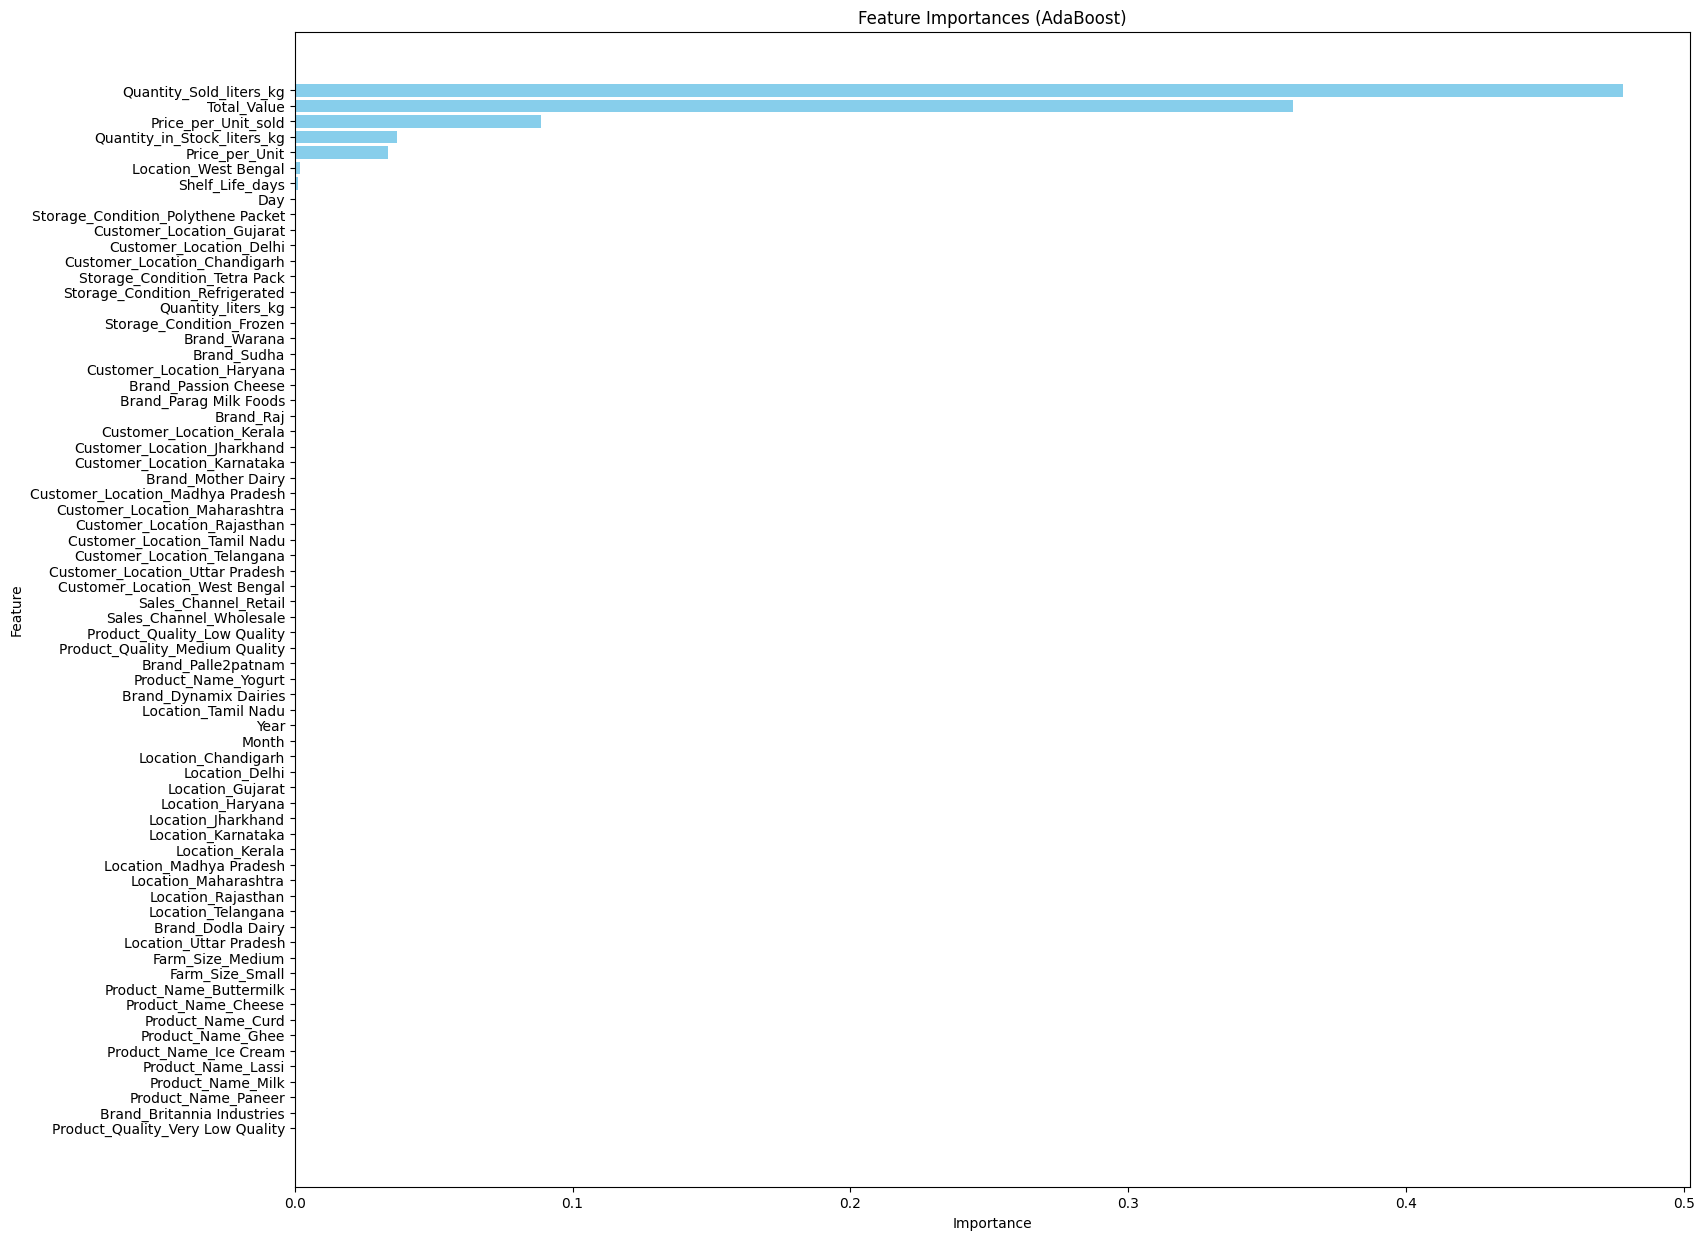

In [ ]:
# Plot feature importances
plt.figure(figsize=(18, 15))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (AdaBoost)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [ ]:
import pandas as pd

# Define model names
model_names = ['Linear Regression', 'Decision Tree Hyperparameters', 'Random Forest Base', 'Random Forest Hyperparameters', 'AdaBoost']

# Define model metrics
metrics = {
    'Training MSE': [0.0889, 0.0320, 0.0005, 0.0807, 0.0443],
    'Testing MSE': [0.0912, 0.0424, 0.0031, 0.0902, 0.0498],
    'Training RMSE': [0.2981, 0.1789, 0.0223, 0.2840, 0.2104],
    'Testing RMSE': [0.3020, 0.2059, 0.0558, 0.3003, 0.2231],
    'Training MAE': [0.1981, 0.1185, 0.0109, 0.1918, 0.1784],
    'Testing MAE': [0.2013, 0.1341, 0.0292, 0.2122, 0.1859],
    'Training R-squared': [0.9123, 0.9684, 0.9995, 0.9204, 0.9563],
    'Testing R-squared': [0.9036, 0.9552, 0.9967, 0.9047, 0.9474]
}

# Create DataFrame
model_comparison_df = pd.DataFrame(metrics, index=model_names)

# Display the DataFrame
model_comparison_df


,Training MSE,Testing MSE,Training RMSE,Testing RMSE,Training MAE,Testing MAE,Training R-squared,Testing R-squared
Linear Regression,0.089,0.091,0.298,0.302,0.198,0.201,0.912,0.904
Decision Tree Hyperparameters,0.032,0.042,0.179,0.206,0.118,0.134,0.968,0.955
Random Forest Base,0.001,0.003,0.022,0.056,0.011,0.029,1.000,0.997
Random Forest Hyperparameters,0.081,0.090,0.284,0.300,0.192,0.212,0.920,0.905
AdaBoost,0.044,0.050,0.210,0.223,0.178,0.186,0.956,0.947


Observations:

Linear Regression Model:

The model performs moderately well with a relatively low training and testing MSE, RMSE, and MAE.
The R-squared value indicates that the model explains approximately 91.2% of the variance in the training data and 90.4% in the testing data.
Decision Tree Model:

The decision tree model shows good performance with low MSE, RMSE, and MAE for both training and testing datasets.
It achieves high R-squared values, suggesting that it fits the data well and explains around 96.8% of the variance in the training data and 95.5% in the testing data.
Random Forest Model (Base and Hyperparameters):

Both the base and hyperparameter-tuned random forest models perform exceptionally well, with significantly low MSE, RMSE, and MAE on both training and testing datasets.
The R-squared values are close to 1, indicating a near-perfect fit to the data.
AdaBoost Model:

The AdaBoost model shows good performance, with relatively low MSE, RMSE, and MAE on both training and testing datasets.
The R-squared values are high, suggesting that it explains a large portion of the variance in the data.

# Conclusions:

Model Comparison:

Among all the models tested, the random forest models (both base and hyperparameter-tuned) exhibit the best performance based on the evaluation metrics. They consistently outperform other models in terms of MSE, RMSE, MAE, and R-squared values.
The decision tree model also performs well but slightly less effectively than the random forest models.
The linear regression model and AdaBoost model perform decently but are outperformed by the decision tree and random forest models.
Model Selection:

Considering the superior performance of the random forest models, especially after hyperparameter tuning, they would be the recommended choice for your project.
The decision tree model could also be a viable option if computational resources are limited, as it provides a good balance between performance and simplicity.
Further Considerations:

It's essential to validate the selected model(s) further using techniques like cross-validation and analyzing their performance on unseen data.
Additionally, consider the interpretability of the models and whether it aligns with the requirements of your project.